## Problem Statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

this command shows maximum columns or features

In [3]:
# import csv file
auto=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\Automobile_insurance_fraud.csv")
auto.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
auto.shape

(1000, 40)

datasset contains 1000 rows and 40 columns or features

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

total 40 columns are there, out of 40,'_c39 ' is completely null columns, we need to dropped,remaining all columns has no null value, so no need of Handling missing value methods

In [6]:
numerical_column=['vehicle_claim','property_claim','injury_claim','total_claim_amount','capital-loss','capital-gains','insured_zip','umbrella_limit','policy_annual_premium','policy_deductable','age','months_as_customer']

In [7]:
auto.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

only one column has null values, 

In [8]:
auto.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


escribe() method give statistical analysis of numerical coulmns only,it denotes, 25 % means first qaurtile, 50% means second quartile and 75% means third quartile and also give mean, standard deviation and minimum and maximum count of each row

In [9]:
auto=auto.drop(columns=['_c39','policy_number'],axis=1)

here i drop two feature '_c39' and 'policy_number' which is unusefull

In [10]:

auto['day'] =pd.DatetimeIndex(auto['policy_bind_date']).day
auto['month'] =pd.DatetimeIndex(auto['policy_bind_date']).month
auto['year'] =pd.DatetimeIndex(auto['policy_bind_date']).year

here " policy_bind_date" is object datatype, we convert it into datetimeIndex and also make three separate columns "day",'month' and 'year' 

In [11]:
auto=auto.drop(columns=['policy_bind_date'],axis=1)

as we made three separate columns so no need of  column 'policy_bind_date'

In [12]:
auto.shape

(1000, 40)

now  we have total 40 features

# Univariate Analysis

In [13]:
auto['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

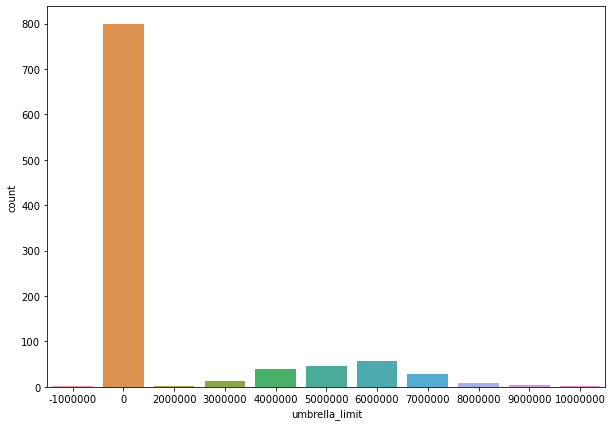

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(auto['umbrella_limit'])

In [15]:
auto['umbrella_limit'].nunique()

11

In [16]:
auto['months_as_customer'].value_counts()

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

In [17]:
auto['months_as_customer'].nunique()

391

In [18]:
auto['insured_zip'].value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

In [19]:
auto['insured_zip'].nunique()

995

In [20]:
auto['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

the feature 'policy_state' has 3 class ,'OH','IL' and "IN"

<AxesSubplot:xlabel='policy_state', ylabel='count'>

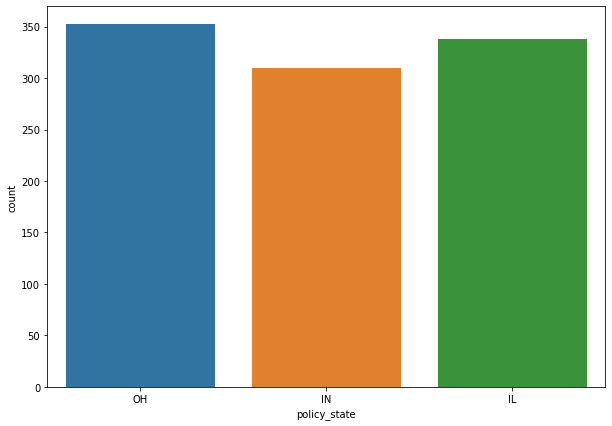

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(auto['policy_state'])

In [22]:
auto['policy_state'].nunique()

3

In [23]:
auto['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

total 3 type of 'policy_csl'

In [24]:
auto['policy_csl'].nunique()

3

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

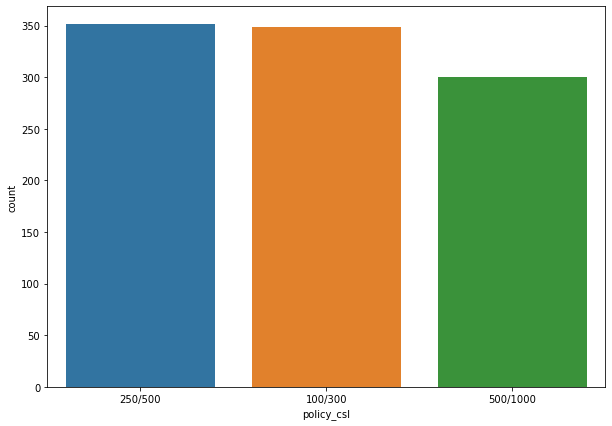

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(auto['policy_csl'])

In [26]:
auto['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [27]:
auto['policy_deductable'].nunique()

3

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

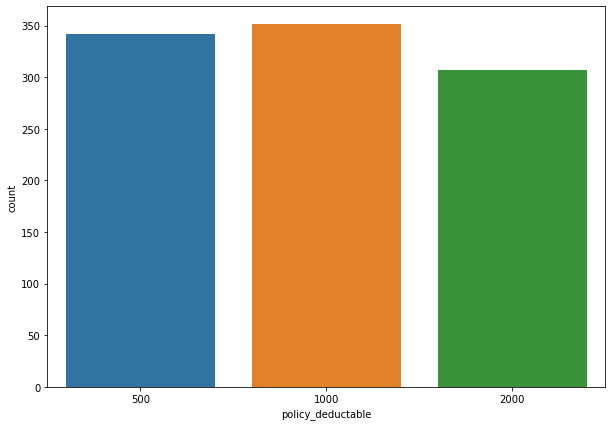

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(auto['policy_deductable'])

In [29]:
auto['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [30]:
auto['insured_sex'].nunique()

2

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

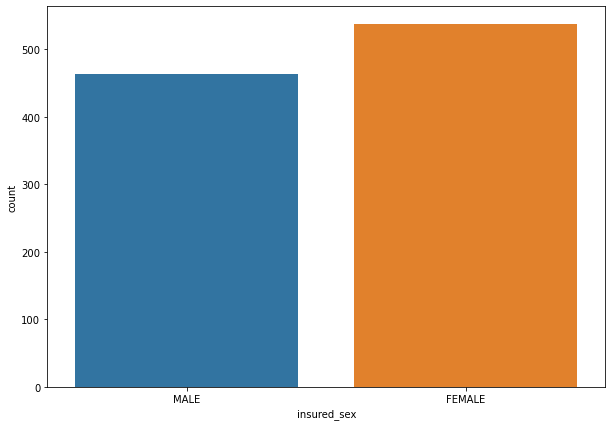

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(auto['insured_sex'])

In [32]:
auto['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [33]:
auto['insured_education_level'].nunique()

7

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

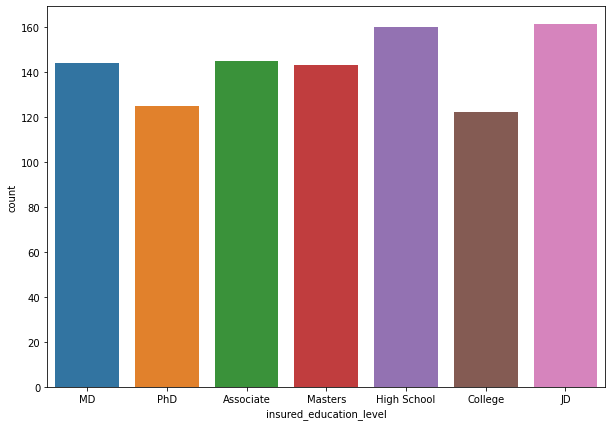

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(auto['insured_education_level'])

In [35]:
auto['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [36]:
auto['insured_occupation'].nunique()

14

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

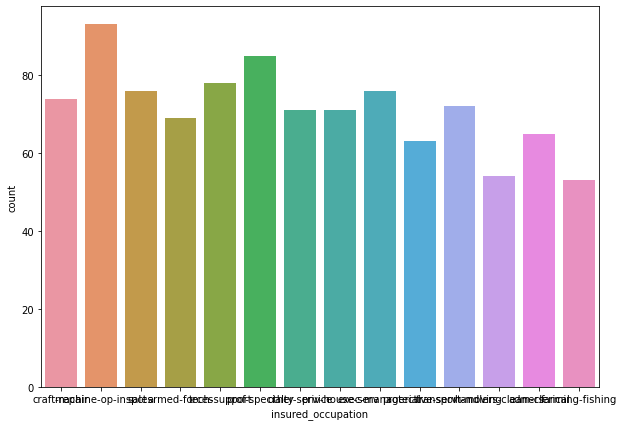

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(auto['insured_occupation'])

In [38]:
auto['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [39]:
auto['insured_hobbies'].nunique()

20

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

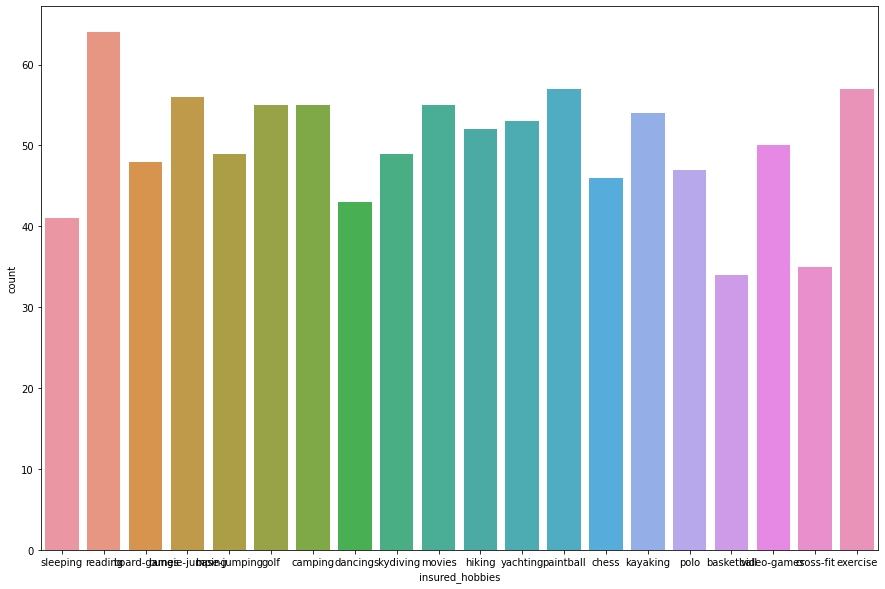

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(auto['insured_hobbies'])

In [41]:
auto['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [42]:
auto['insured_relationship'].nunique()

6

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

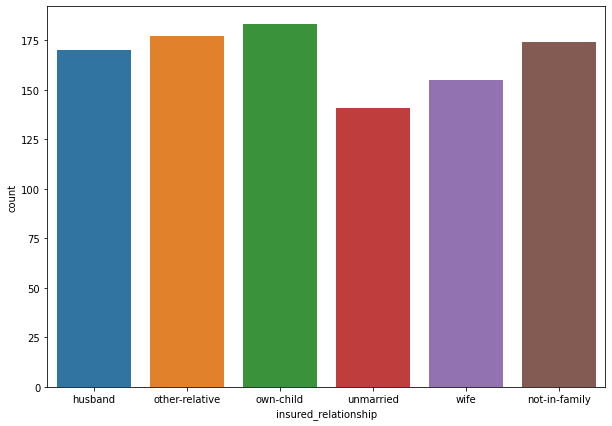

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(auto['insured_relationship'])

In [44]:
auto['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
31-01-2015    20
06-02-2015    20
22-02-2015    20
12-02-2015    20
21-01-2015    19
21-02-2015    19
14-01-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-02-2015    18
28-02-2015    18
18-01-2015    18
25-02-2015    18
01-02-2015    18
20-01-2015    18
03-01-2015    18
09-01-2015    17
26-02-2015    17
06-01-2015    17
24-02-2015    17
08-02-2015    17
13-02-2015    16
05-02-2015    16
16-01-2015    16
15-02-2015    16
16-02-2015    16
18-02-2015    15
28-01-2015    15
15-01-2015    15
17-01-2015    15
27-02-2015    14
20-02-2015    14
22-01-2015    14
23-01-2015    13
27-01-2015    13
09-02-2015    13
03-02-2015    13
01-03-2015    12
04-01-2015    12
29-01-2015    11
26-01-2015    11
02-01-2015    11
07-02-2015    10
25-01-2015    10
19-02-2015    10
11-02-2015    10
10-02-2015    10
11-01-2015    

In [45]:
auto['incident_date'].nunique()

60

In [46]:
auto['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [47]:
auto['incident_type'].nunique()

4

<AxesSubplot:xlabel='incident_type', ylabel='count'>

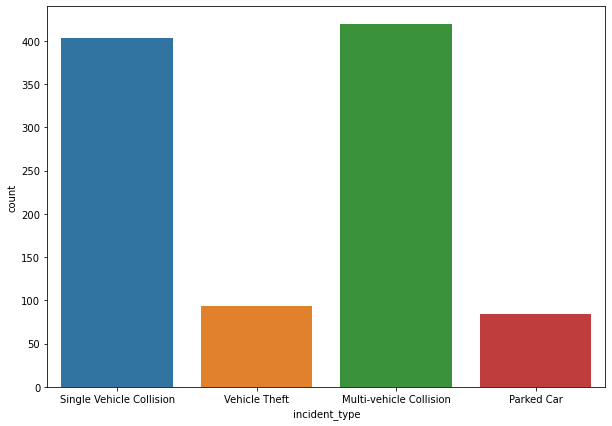

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(auto['incident_type'])

In [49]:
auto['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [50]:
auto['collision_type'].nunique()

4

<AxesSubplot:xlabel='collision_type', ylabel='count'>

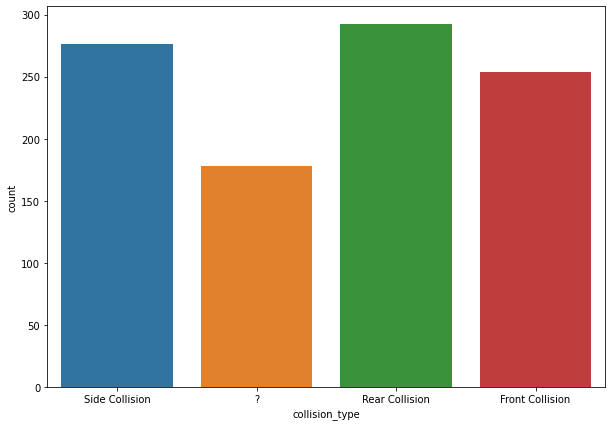

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(auto['collision_type'])

In [52]:
auto['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [53]:
auto['incident_severity'].nunique()

4

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

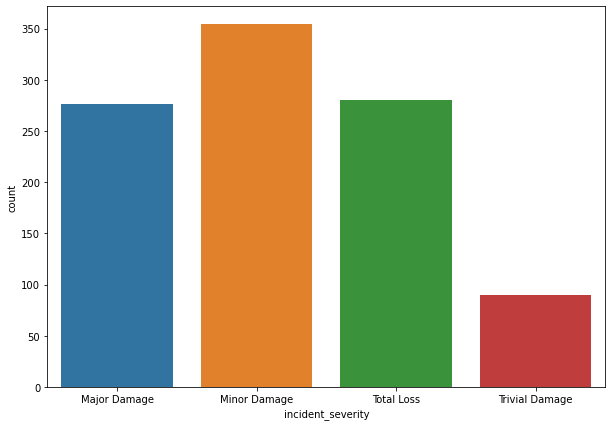

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(auto['incident_severity'])

In [55]:
auto['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [56]:
auto['authorities_contacted'].nunique()

5

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

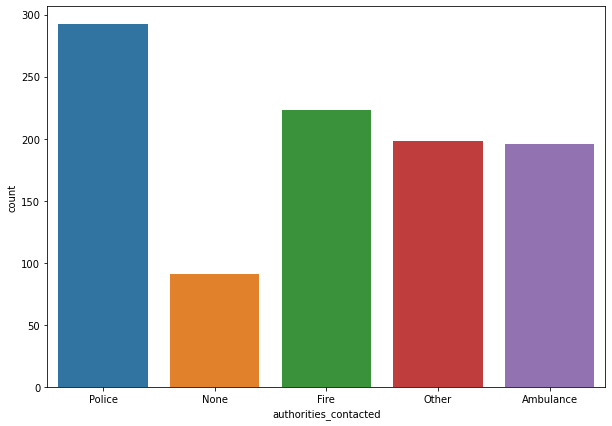

In [57]:
plt.figure(figsize=(10,7))
sns.countplot(auto['authorities_contacted'])

In [58]:
auto['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [59]:
auto['incident_state'].nunique()

7

<AxesSubplot:xlabel='incident_state', ylabel='count'>

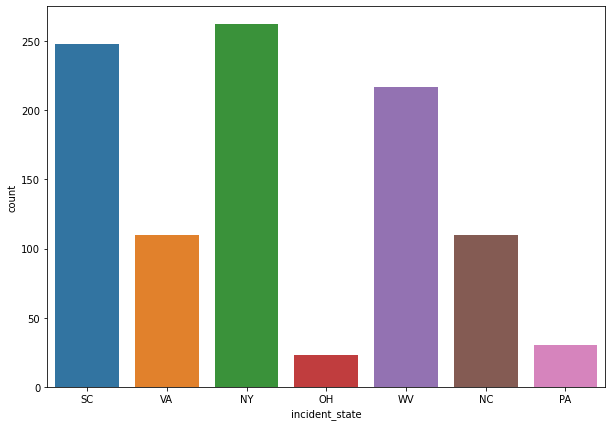

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(auto['incident_state'])

In [61]:
auto['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [62]:
auto['incident_city'].nunique()

7

<AxesSubplot:xlabel='incident_city', ylabel='count'>

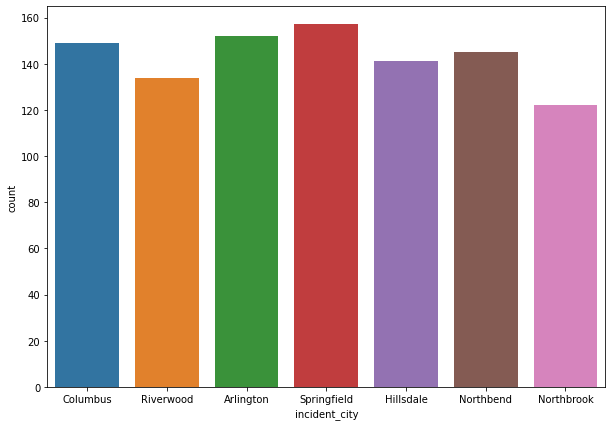

In [63]:
plt.figure(figsize=(10,7))
sns.countplot(auto['incident_city'])

In [64]:
auto['incident_location'].value_counts()

3726 MLK Hwy        1
2900 Sky Drive      1
1381 Francis Ave    1
7041 Tree Ridge     1
2063 Weaver St      1
                   ..
8524 Pine Lane      1
3809 Texas Lane     1
1376 Pine St        1
5445 Tree Hwy       1
3818 Texas Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [65]:
auto['incident_location'].nunique()

1000

In [66]:
auto['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [67]:
auto['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [68]:
auto['property_damage'].nunique()

3

<AxesSubplot:xlabel='property_damage', ylabel='count'>

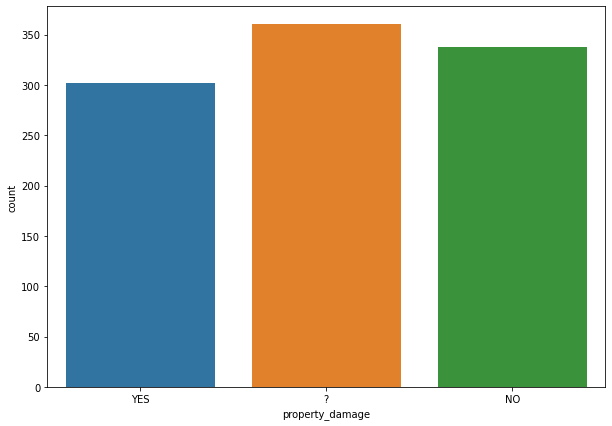

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(auto['property_damage'])

In [70]:
auto['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [71]:
auto['police_report_available'].nunique()

3

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

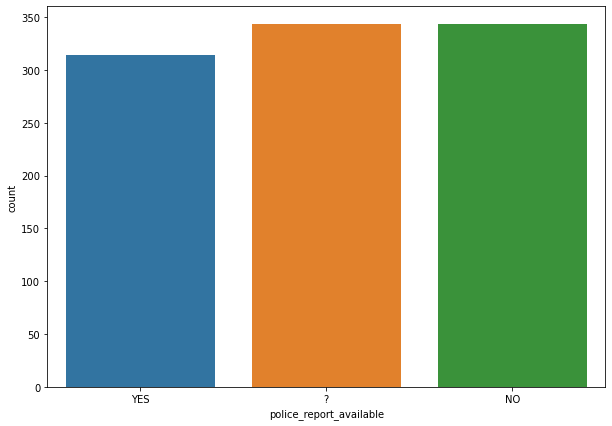

In [72]:
plt.figure(figsize=(10,7))
sns.countplot(auto['police_report_available'])

In [73]:
auto['auto_make'].value_counts()

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [74]:
auto['auto_make'].nunique()

14

<AxesSubplot:xlabel='auto_make', ylabel='count'>

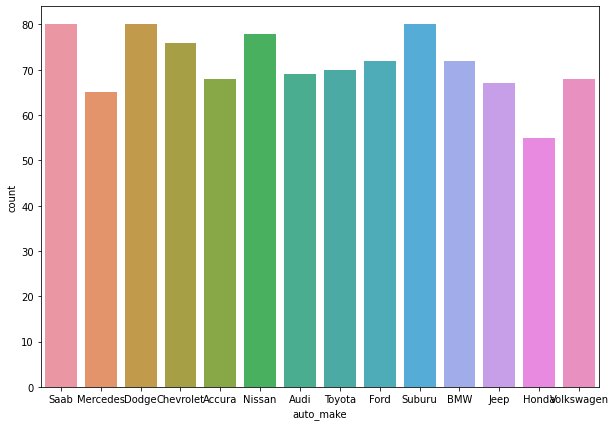

In [75]:
plt.figure(figsize=(10,7))
sns.countplot(auto['auto_make'])

In [76]:
auto['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Forrestor         28
Camry             28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Maxima            24
Tahoe             24
X5                23
Ultima            23
Highlander        22
Silverado         22
Civic             22
Fusion            21
ML350             20
TL                20
Impreza           20
CRV               20
Corolla           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [77]:
auto['auto_model'].nunique()

39

<AxesSubplot:xlabel='auto_model', ylabel='count'>

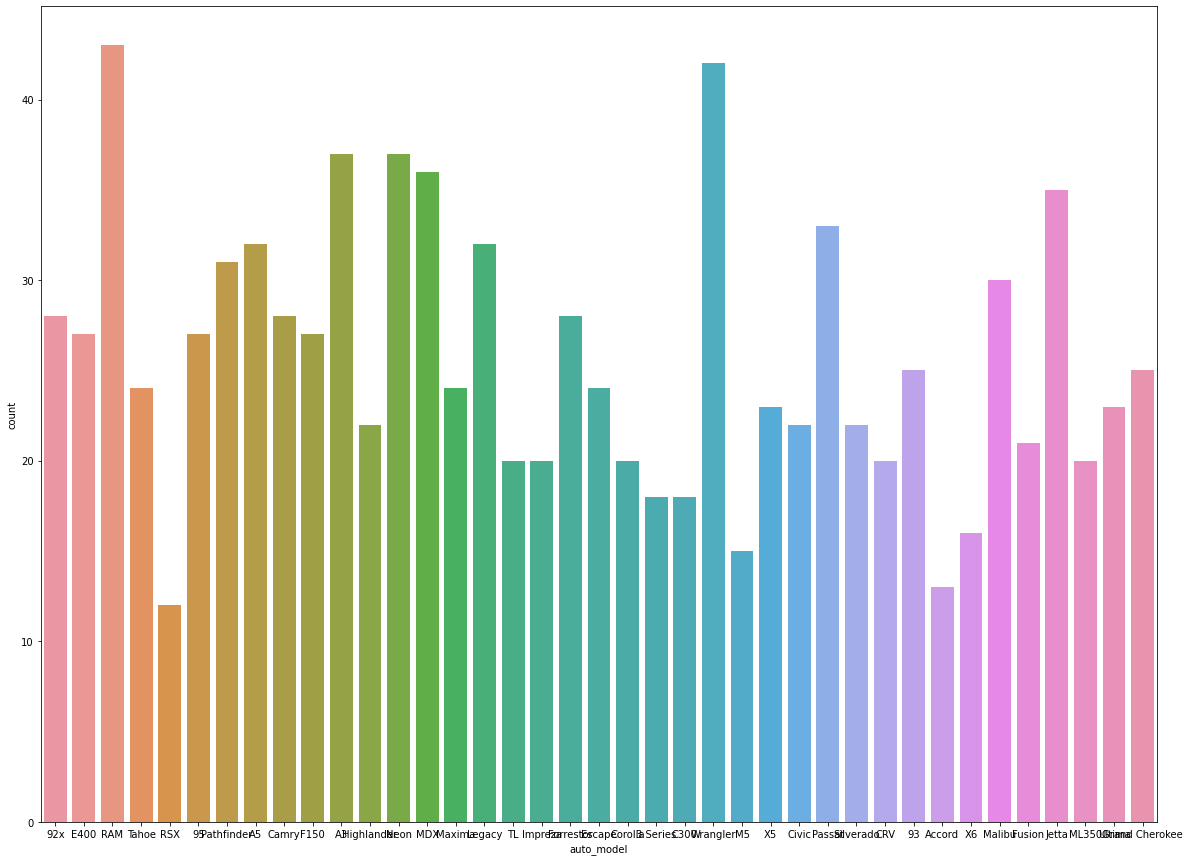

In [78]:
plt.figure(figsize=(20,15))
sns.countplot(auto['auto_model'])

In [79]:
auto['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [80]:
247/753

0.3280212483399734

## The label "fraud_reported" is binary class ,and ratio of its class is 70:30, so no imbalance, no need of SMOTE and Near miss. and our problem is classification type

In [81]:
auto['fraud_reported'].nunique()

2

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

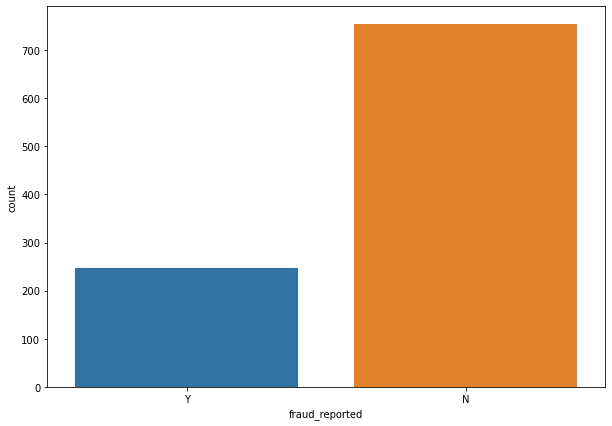

In [82]:
plt.figure(figsize=(10,7))
sns.countplot(auto['fraud_reported'])

In [83]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

# Label Encoding

In encoding techniques, we replace categorical data by numerical data, here we used label encoding which assign 0 to n-1 number to  n class 

In [84]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#lab_enc=LabeLEncoder()
auto['fraud_reported']=le.fit_transform(auto['fraud_reported'].astype(str))
auto['policy_state']=le.fit_transform(auto['policy_state'].astype(str))
auto['policy_csl']=le.fit_transform(auto['policy_csl'].astype(str))
auto['insured_sex']=le.fit_transform(auto['insured_sex'].astype(str))
auto['insured_education_level']=le.fit_transform(auto['insured_education_level'].astype(str))
auto['insured_occupation']=le.fit_transform(auto['insured_occupation'].astype(str))
auto['insured_hobbies']=le.fit_transform(auto['insured_hobbies'].astype(str))
auto['insured_relationship']=le.fit_transform(auto['insured_relationship'].astype(str))
auto['incident_type']=le.fit_transform(auto['incident_type'].astype(str))
auto['incident_severity']=le.fit_transform(auto['incident_severity'].astype(str))
auto['authorities_contacted']=le.fit_transform(auto['authorities_contacted'].astype(str))
auto['incident_state']=le.fit_transform(auto['incident_state'].astype(str))
auto['incident_city']=le.fit_transform(auto['incident_city'].astype(str))
auto['incident_location']=le.fit_transform(auto['incident_location'].astype(str))
auto['property_damage']=le.fit_transform(auto['property_damage'].astype(str))
auto['police_report_available']=le.fit_transform(auto['police_report_available'].astype(str))
auto['auto_make']=le.fit_transform(auto['auto_make'].astype(str))
auto['auto_model']=le.fit_transform(auto['auto_model'].astype(str))
auto['collision_type']=le.fit_transform(auto['collision_type'].astype(str))

In [85]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int32  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

here we can see that all columns contains numerical values, only one column is object which is encoded below

In [86]:
auto['incident_date']

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object

In [87]:
auto['incident_date'].nunique()

60

In [88]:
auto['Incident day'] =pd.DatetimeIndex(auto['incident_date']).day
auto['Incident month'] =pd.DatetimeIndex(auto['incident_date']).month
auto['Incident year'] =pd.DatetimeIndex(auto['incident_date']).year

Here we convert "incident_date" into three columns,'Incident day','Incident month','Incident year'

In [89]:
auto=auto.drop(columns=['incident_date'],axis=1)

no need of column 'Incident_date' now due to feature engineering

In [90]:
auto.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year,Incident day,Incident month,Incident year
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,17,10,2014,25,1,2015
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,27,6,2006,21,1,2015
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0,9,6,2000,22,2,2015
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1,25,5,1990,1,10,2015
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0,6,6,2014,17,2,2015


In [91]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int32  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

In [92]:
auto.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year,Incident day,Incident month,Incident year
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,17,10,2014,25,1,2015
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,27,6,2006,21,1,2015
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0,9,6,2000,22,2,2015
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1,25,5,1990,1,10,2015
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0,6,6,2014,17,2,2015


In [93]:
auto['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [94]:
auto['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [95]:
auto['incident_location'].value_counts()

999    1
328    1
341    1
340    1
339    1
      ..
661    1
660    1
659    1
658    1
0      1
Name: incident_location, Length: 1000, dtype: int64

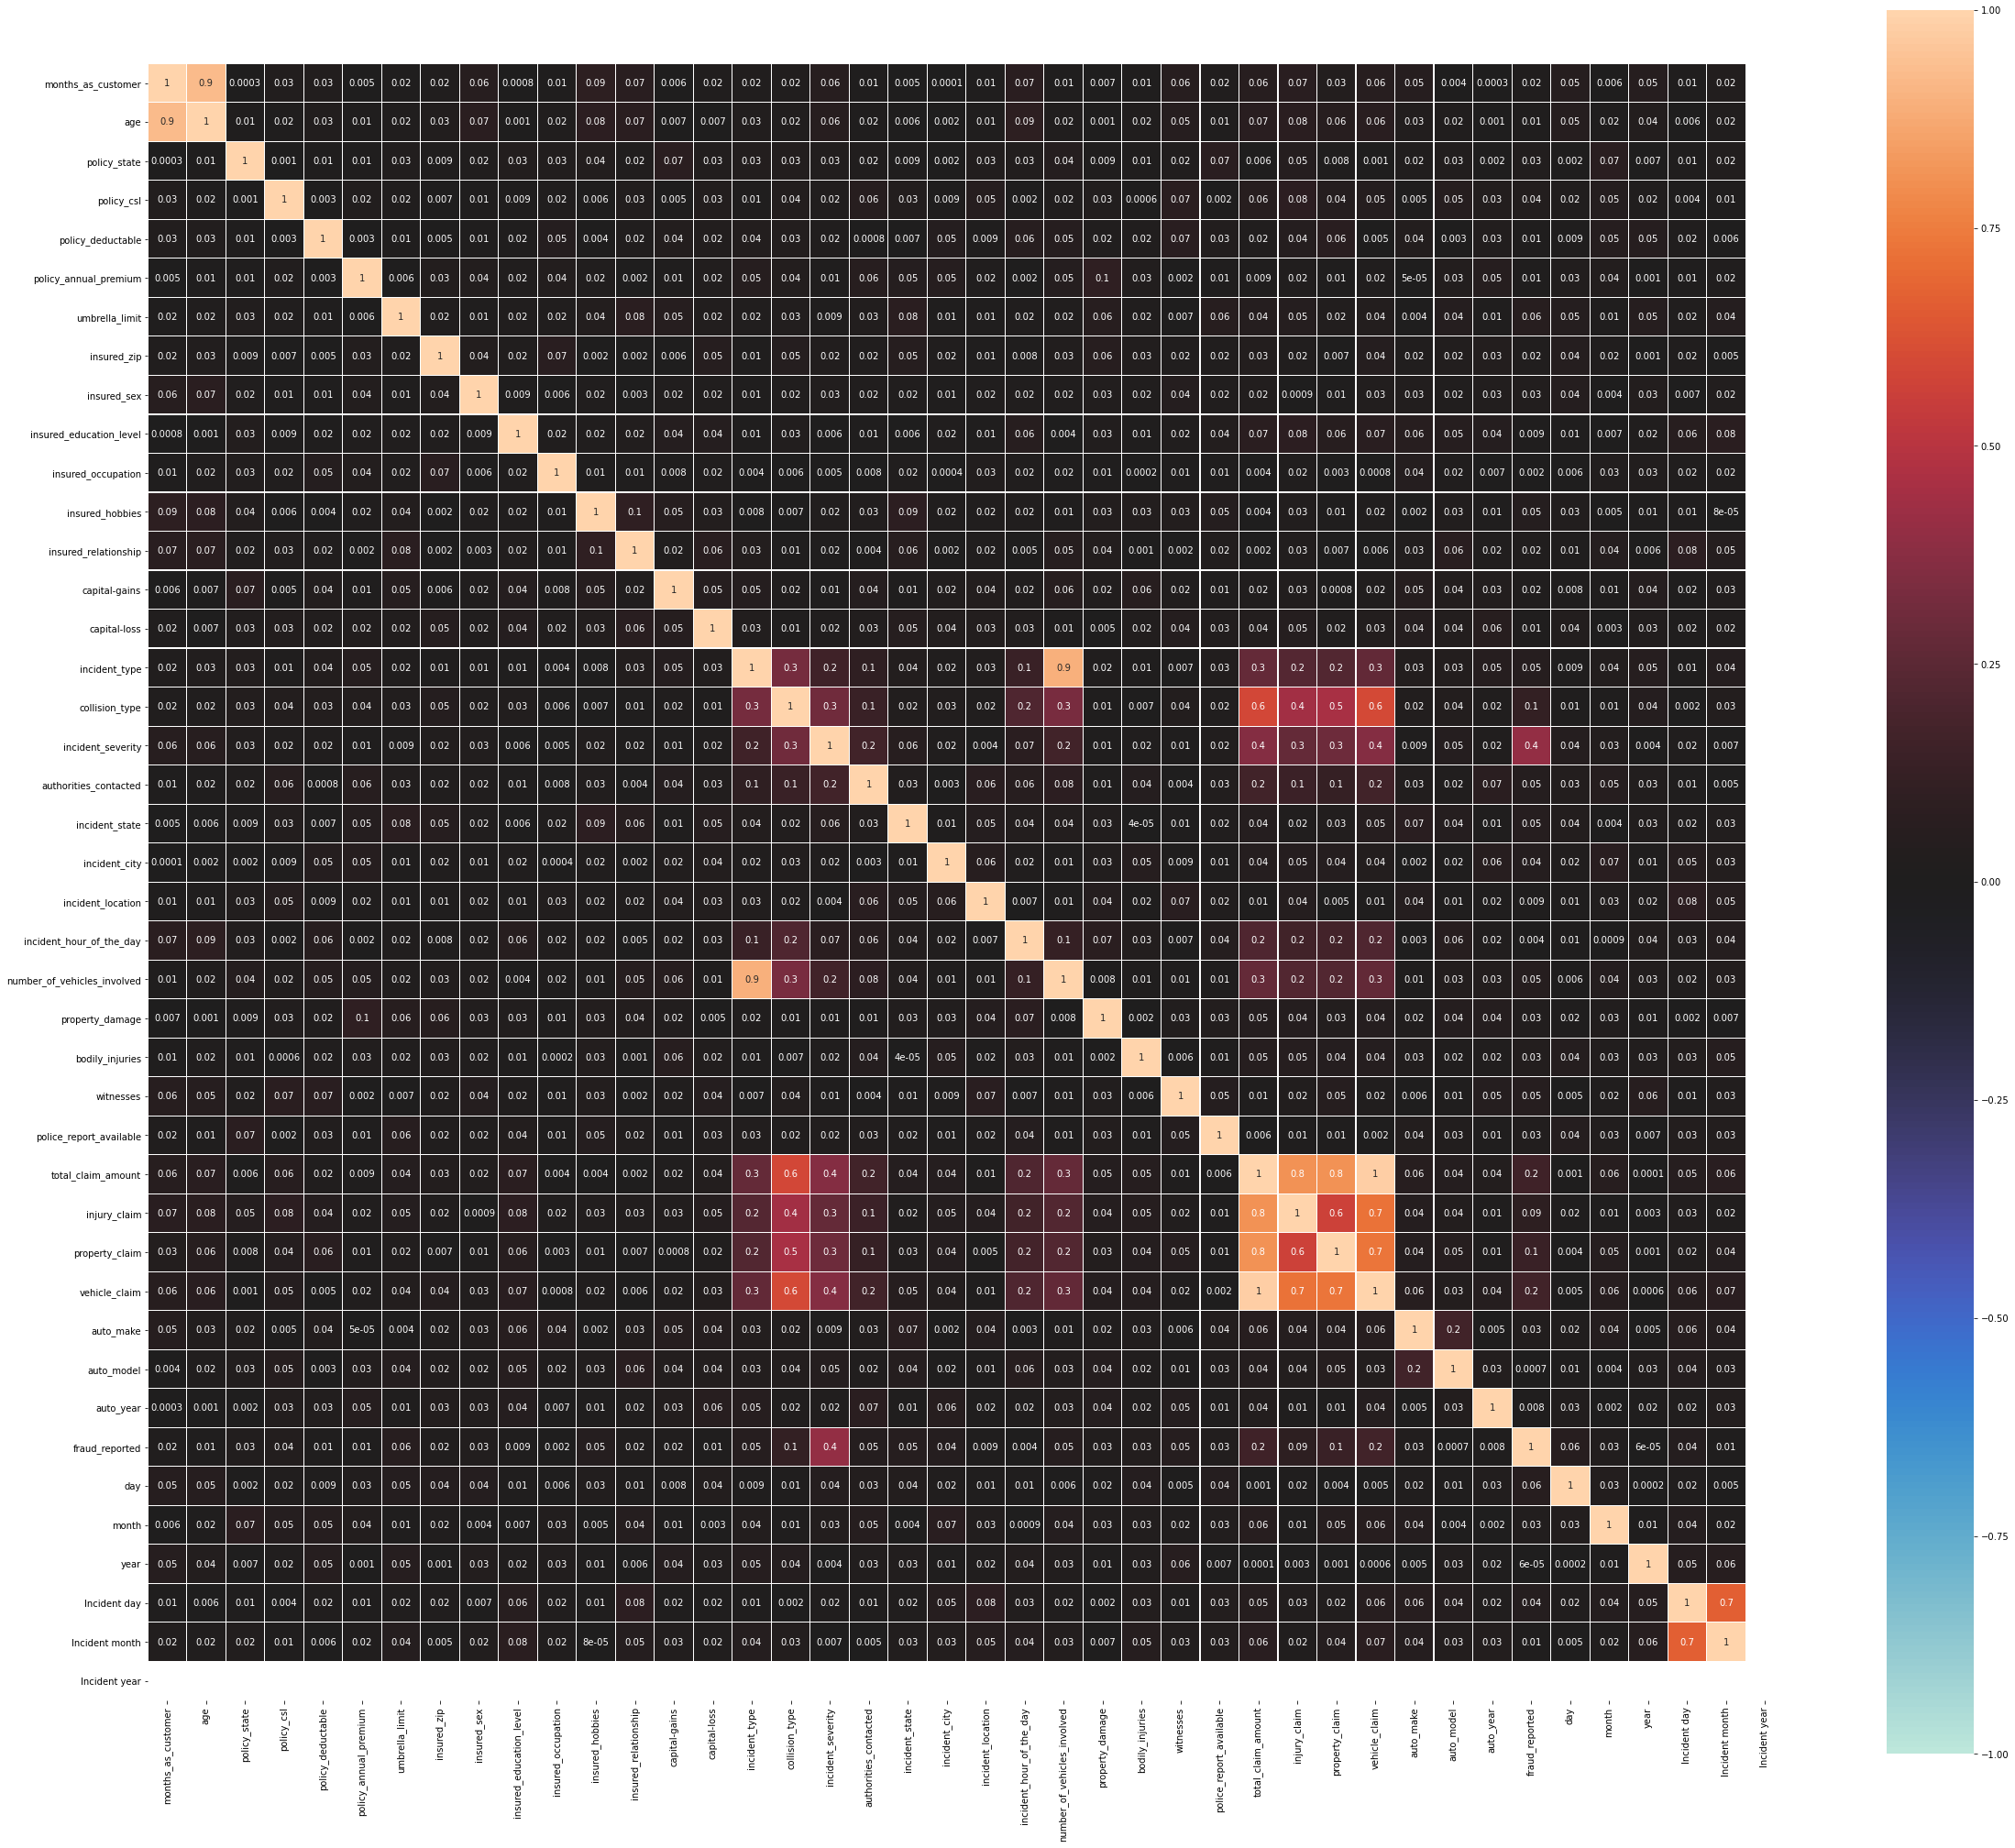

In [96]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=auto.corr().abs()
plt.figure(figsize=(40,35))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label, correaltion between feature 'fraud_reported' with other feature is very less, but we know that label 'fraud_reported' is categorical value, thats why we get less correation, we can not compare correlation between categorical and continous data.

In [97]:
corr_matrix=df_corr.corr()   # here we get values of correlation in descending order
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
incident_severity              0.633247
vehicle_claim                  0.270014
total_claim_amount             0.261226
property_claim                 0.256456
collision_type                 0.227644
injury_claim                   0.205430
authorities_contacted          0.069435
number_of_vehicles_involved    0.069288
incident_type                  0.063539
day                            0.025925
incident_state                 0.013894
umbrella_limit                 0.011050
policy_csl                    -0.009676
witnesses                     -0.010222
incident_city                 -0.014117
insured_hobbies               -0.015415
bodily_injuries               -0.023013
month                         -0.023070
incident_hour_of_the_day      -0.028325
insured_sex                   -0.033351
policy_state                  -0.039835
property_damage               -0.041773
Incident day                  -0.044559
police_report_available       -0.046063


first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable

In [98]:
auto_1=auto.drop(columns=['policy_state','policy_csl','policy_deductable','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','auto_make','auto_model','auto_year','day','month','Incident day','Incident month','Incident year','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','year','fraud_reported','umbrella_limit'],axis=1)

auto_1 is a dataframe which contains only continous data features. we drop all categorical features from data, so we can perform further operation

In [99]:
auto_1.shape

(1000, 11)

this show total 11 feature as continous features

In [100]:
auto_cat=auto.drop(columns=['vehicle_claim','property_claim','injury_claim','total_claim_amount','capital-loss','capital-gains',
'insured_zip','policy_annual_premium','age','months_as_customer','incident_location'],axis=1)

auto_cat is categorical dataset , which contains only categorical features only

In [101]:
auto_cat.shape

(1000, 31)

total 31 features are belongs to categorical features

In [102]:
numerical_column

['vehicle_claim',
 'property_claim',
 'injury_claim',
 'total_claim_amount',
 'capital-loss',
 'capital-gains',
 'insured_zip',
 'umbrella_limit',
 'policy_annual_premium',
 'policy_deductable',
 'age',
 'months_as_customer']

In [103]:
auto_1.head()

,months_as_customer,age,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_location,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1406.91,466132,53300,0,996,71610,6510,13020,52080
1,228,42,1197.22,468176,0,0,628,5070,780,780,3510
2,134,29,1413.14,430632,35100,0,685,34650,7700,3850,23100
3,256,41,1415.74,608117,48900,-62400,669,63400,6340,6340,50720
4,228,44,1583.91,610706,66000,-46000,220,6500,1300,650,4550


In [104]:
auto_cat.head()

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,day,month,year,Incident day,Incident month,Incident year
0,2,1,1000,0,1,4,2,17,0,2,3,0,4,4,1,5,1,2,1,2,2,10,1,2004,1,17,10,2014,25,1,2015
1,1,1,2000,5000000,1,4,6,15,2,3,0,1,4,5,5,8,1,0,0,0,0,8,12,2007,1,27,6,2006,21,1,2015
2,2,0,2000,5000000,0,6,11,2,3,0,2,1,4,1,1,7,3,1,2,3,1,4,30,2007,0,9,6,2000,22,2,2015
3,0,1,2000,6000000,0,6,1,2,4,2,1,0,4,2,0,5,1,0,1,2,1,3,34,2014,1,25,5,1990,1,10,2015
4,0,2,1000,6000000,1,0,11,2,4,3,0,1,2,1,0,20,1,1,0,1,1,0,31,2009,0,6,6,2014,17,2,2015


# Outlier detections

We can placed z score on normal distribution curve ranges from -3 standard deviation to the left of normal distribution curve to +3 S.D to right of normal distribution ,there we select z<3,and with value it cover almost 97.72 area of Distribution.z score represent the number of  standard deviation with which value of observation differ than mean value

<function matplotlib.pyplot.show(close=None, block=None)>

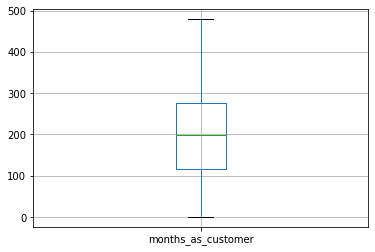

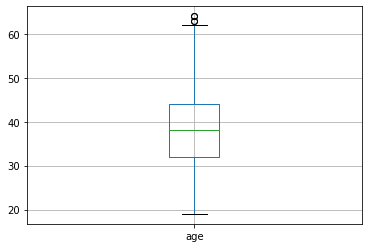

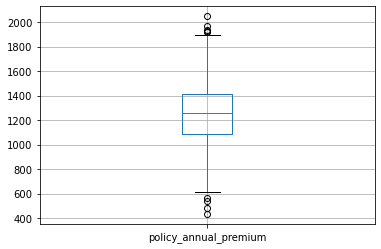

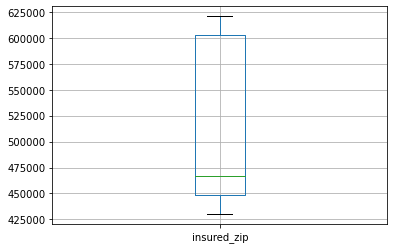

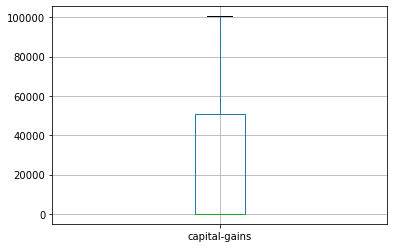

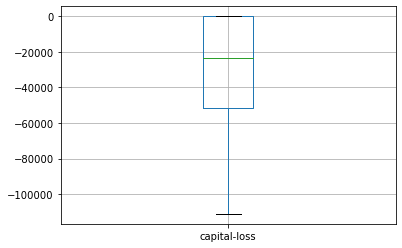

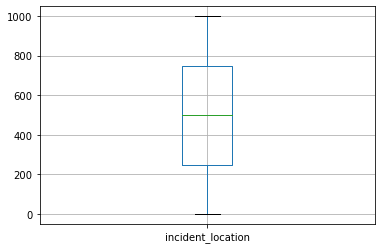

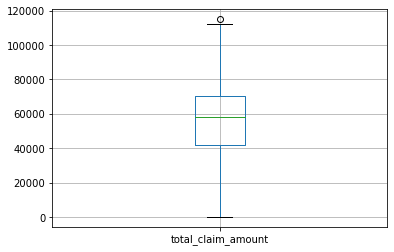

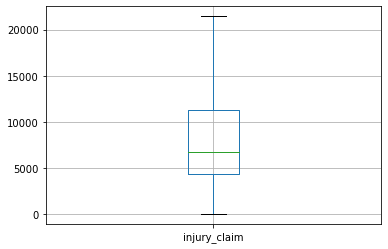

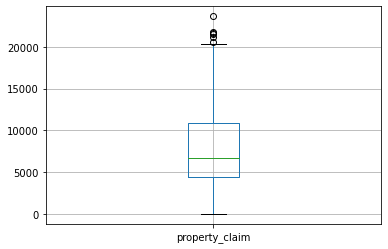

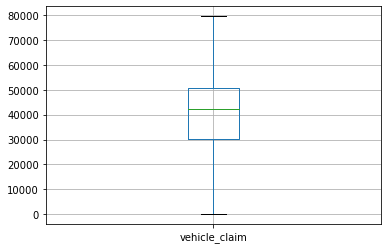

In [105]:
for column in auto_1:  # we pass every column to for loop
    plt.figure()   
    auto_1.boxplot([column]) # box plot of every column is plotted
plt.show

here we can see that  feature 'age','policy_annual_premium','total_claim_amount','property_claim' has outliers

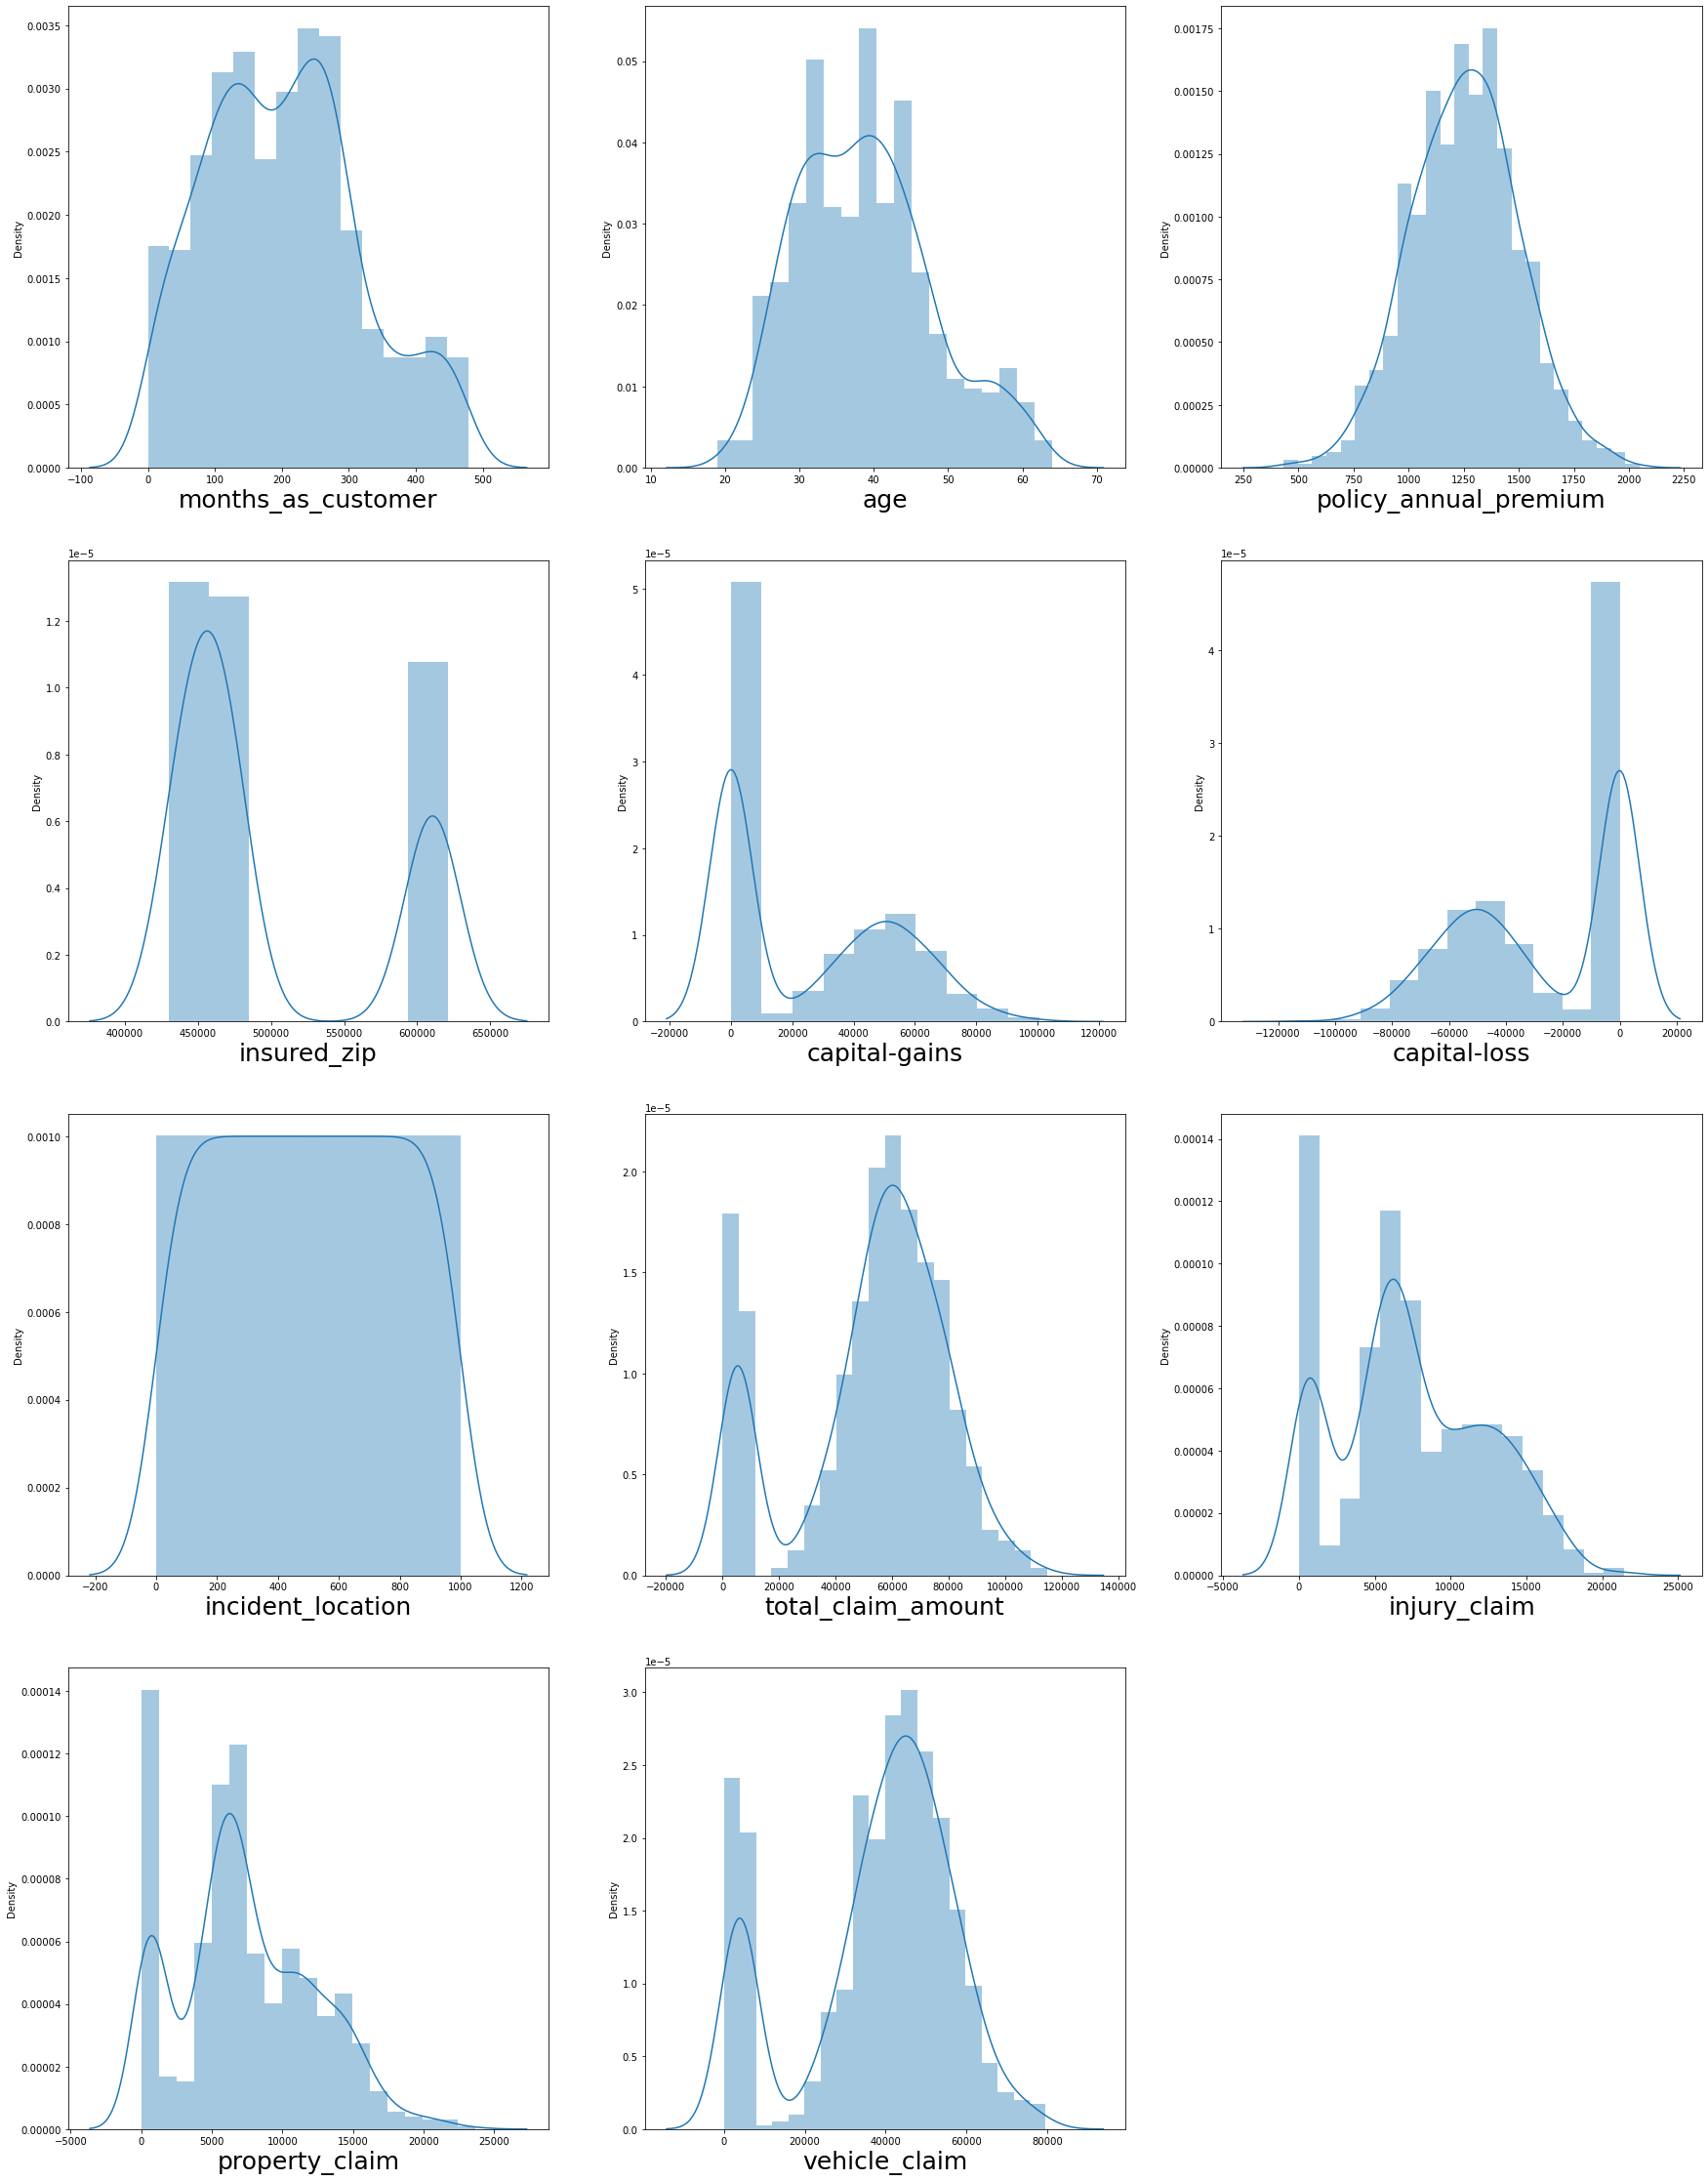

In [106]:
plt.figure(figsize=(30,40)) # 30 represnt row dimension and 40 represents column dimension
plotnumber=1# initially plotnumber is set to1
for column in auto_1: # pass every column in for loop
    if plotnumber<=15: # maximum value for plotnumber is set to 15, generallay it is equal to number of columns in dataframe
        plt.subplot(4,3,plotnumber) # we draw,subplot in 4 rows and 3 columns
        sns.distplot(auto_1[column])  #draw distplot for each column
        plt.xlabel(column,fontsize=25) # assign label to x axis which is column name
    plotnumber+=1  # increment the plotnumber after every iteration
plt.show() # display the plot

# Outlier Removal

In [107]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(auto_1))
auto_1=auto_1[(z<3).all(axis=1)]  # z score with std deviation =3

<function matplotlib.pyplot.show(close=None, block=None)>

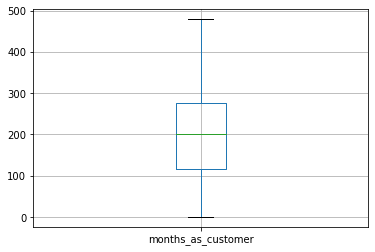

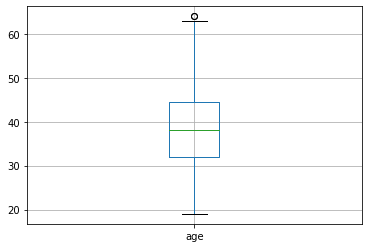

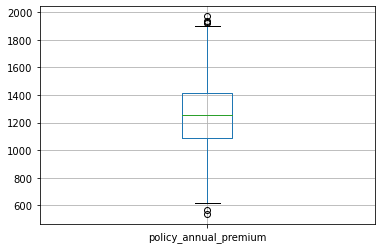

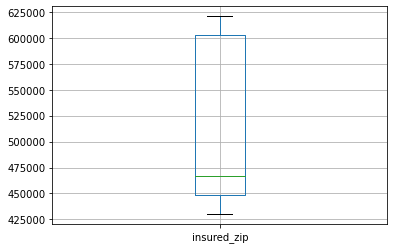

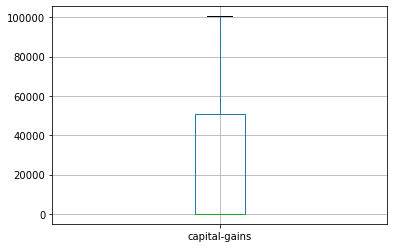

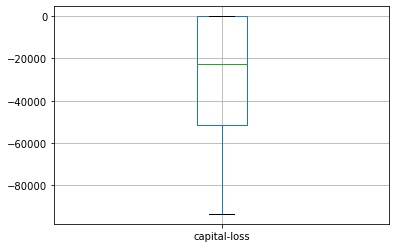

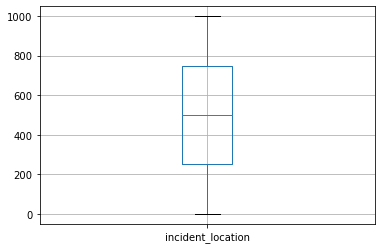

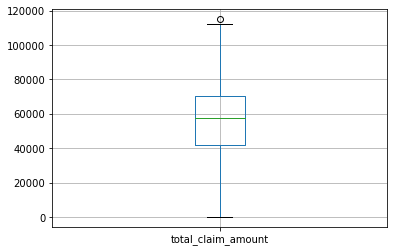

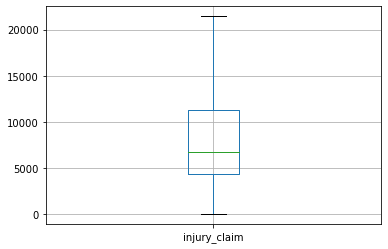

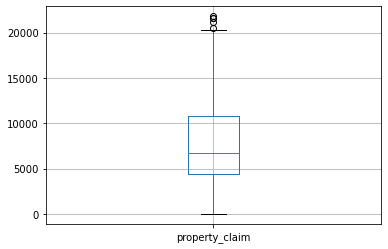

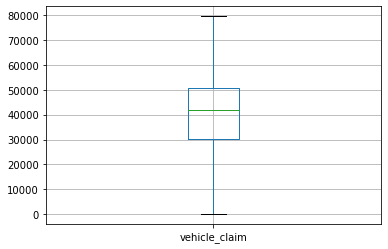

In [108]:
for column in auto_1:  # we pass every column to for loop
    plt.figure()   
    auto_1.boxplot([column]) # box plot of every column is plotted
plt.show

here we remove some outliers using zscore method, now we use some more method

In [109]:
auto_1.isnull().sum()

months_as_customer       0
age                      0
policy_annual_premium    0
insured_zip              0
capital-gains            0
capital-loss             0
incident_location        0
total_claim_amount       0
injury_claim             0
property_claim           0
vehicle_claim            0
dtype: int64

In [110]:
auto_1.shape

(995, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

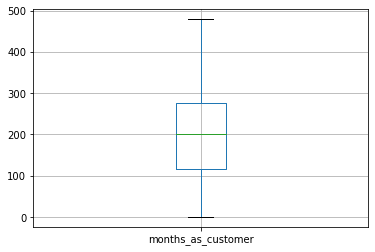

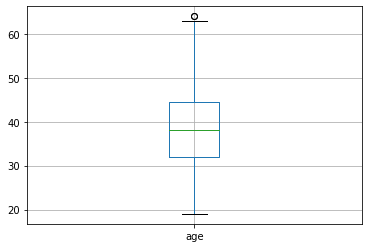

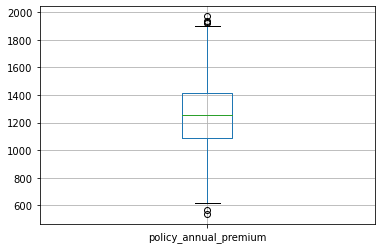

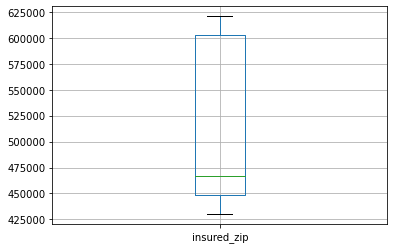

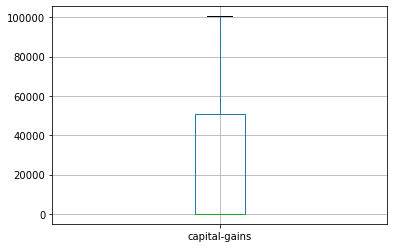

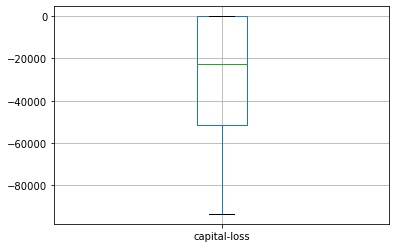

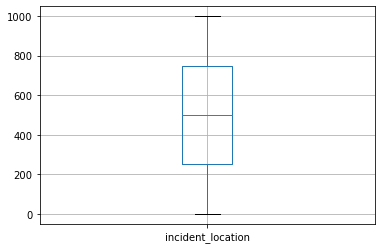

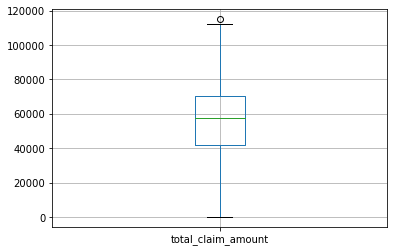

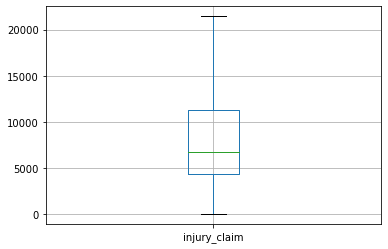

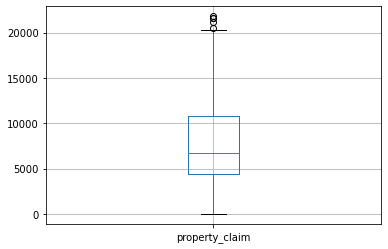

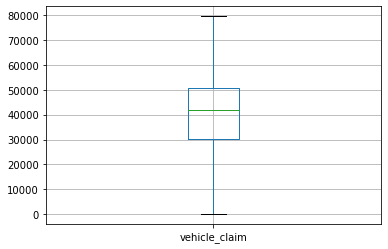

In [111]:
for column in auto_1:  # we pass every column to for loop
    plt.figure()   
    auto_1.boxplot([column]) # box plot of every column is plotted
plt.show

Now we use Quantile method to remove some more outliers

In [112]:
q=auto_1['policy_annual_premium'].quantile(0.91)# we are removing the bottom 1% data from column "policy_annual_premium"
auto_2=auto_1[auto_1['policy_annual_premium']>q]
q=auto_1['policy_annual_premium'].quantile(0.91) # we are removing the top 1% data from column "policy_annual_premium"
auto_2=auto_1[auto_1['policy_annual_premium']<q]
q=auto_1['age'].quantile(0.97) # we are removing the top 1% data from column "age"
auto_2=auto_1[auto_1['age']<q]
q=auto_1['total_claim_amount'].quantile(0.95) # we are removing the top 1% data from column "total_claim_amount"
auto_2=auto_1[auto_1['total_claim_amount']<q]
q=auto_1['property_claim'].quantile(0.94) # we are removing the top 1% data from column "total_claim_amount"
auto_2=auto_1[auto_1['property_claim']<q]



In [113]:
auto_2.shape

(934, 11)

now we have 934 rows and 11 columns

In [114]:
auto_2.isnull().sum()

months_as_customer       0
age                      0
policy_annual_premium    0
insured_zip              0
capital-gains            0
capital-loss             0
incident_location        0
total_claim_amount       0
injury_claim             0
property_claim           0
vehicle_claim            0
dtype: int64

In [115]:
934/1000

0.934

we lost almost 6 to 7% data, we can not reduce more than this

<function matplotlib.pyplot.show(close=None, block=None)>

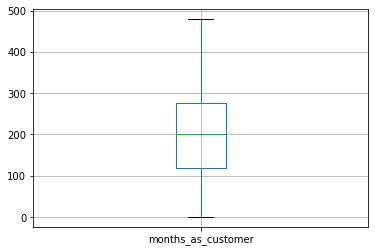

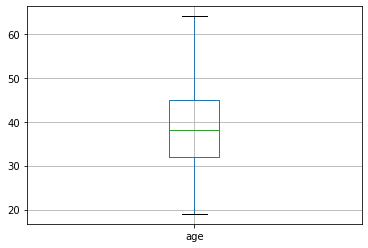

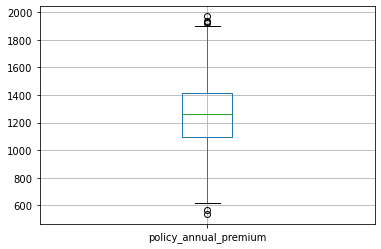

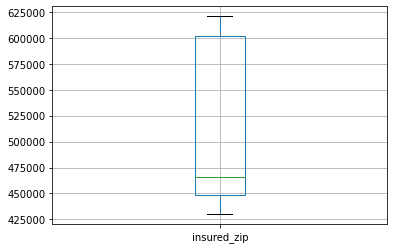

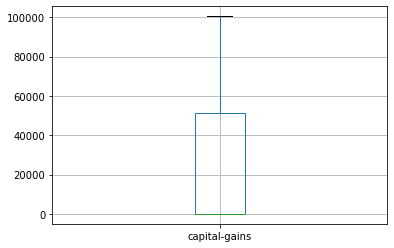

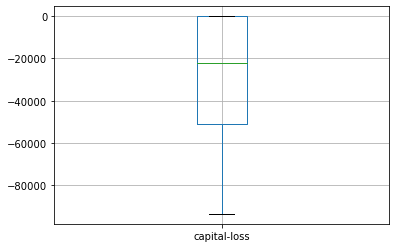

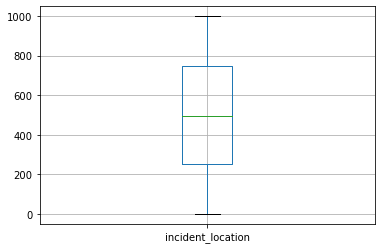

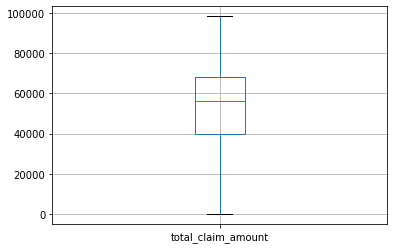

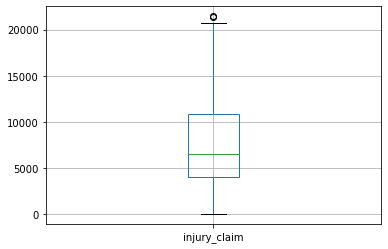

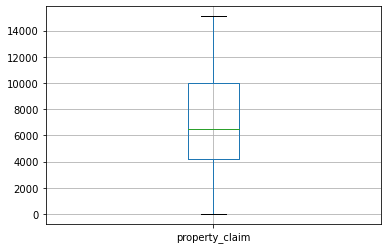

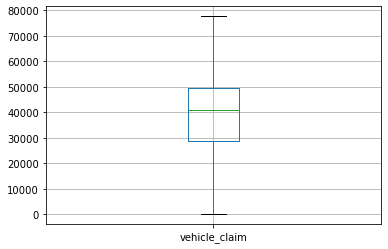

In [116]:
for column in auto_2:  # we pass every column to for loop
    plt.figure()   
    auto_2.boxplot([column]) # box plot of every column is plotted
plt.show

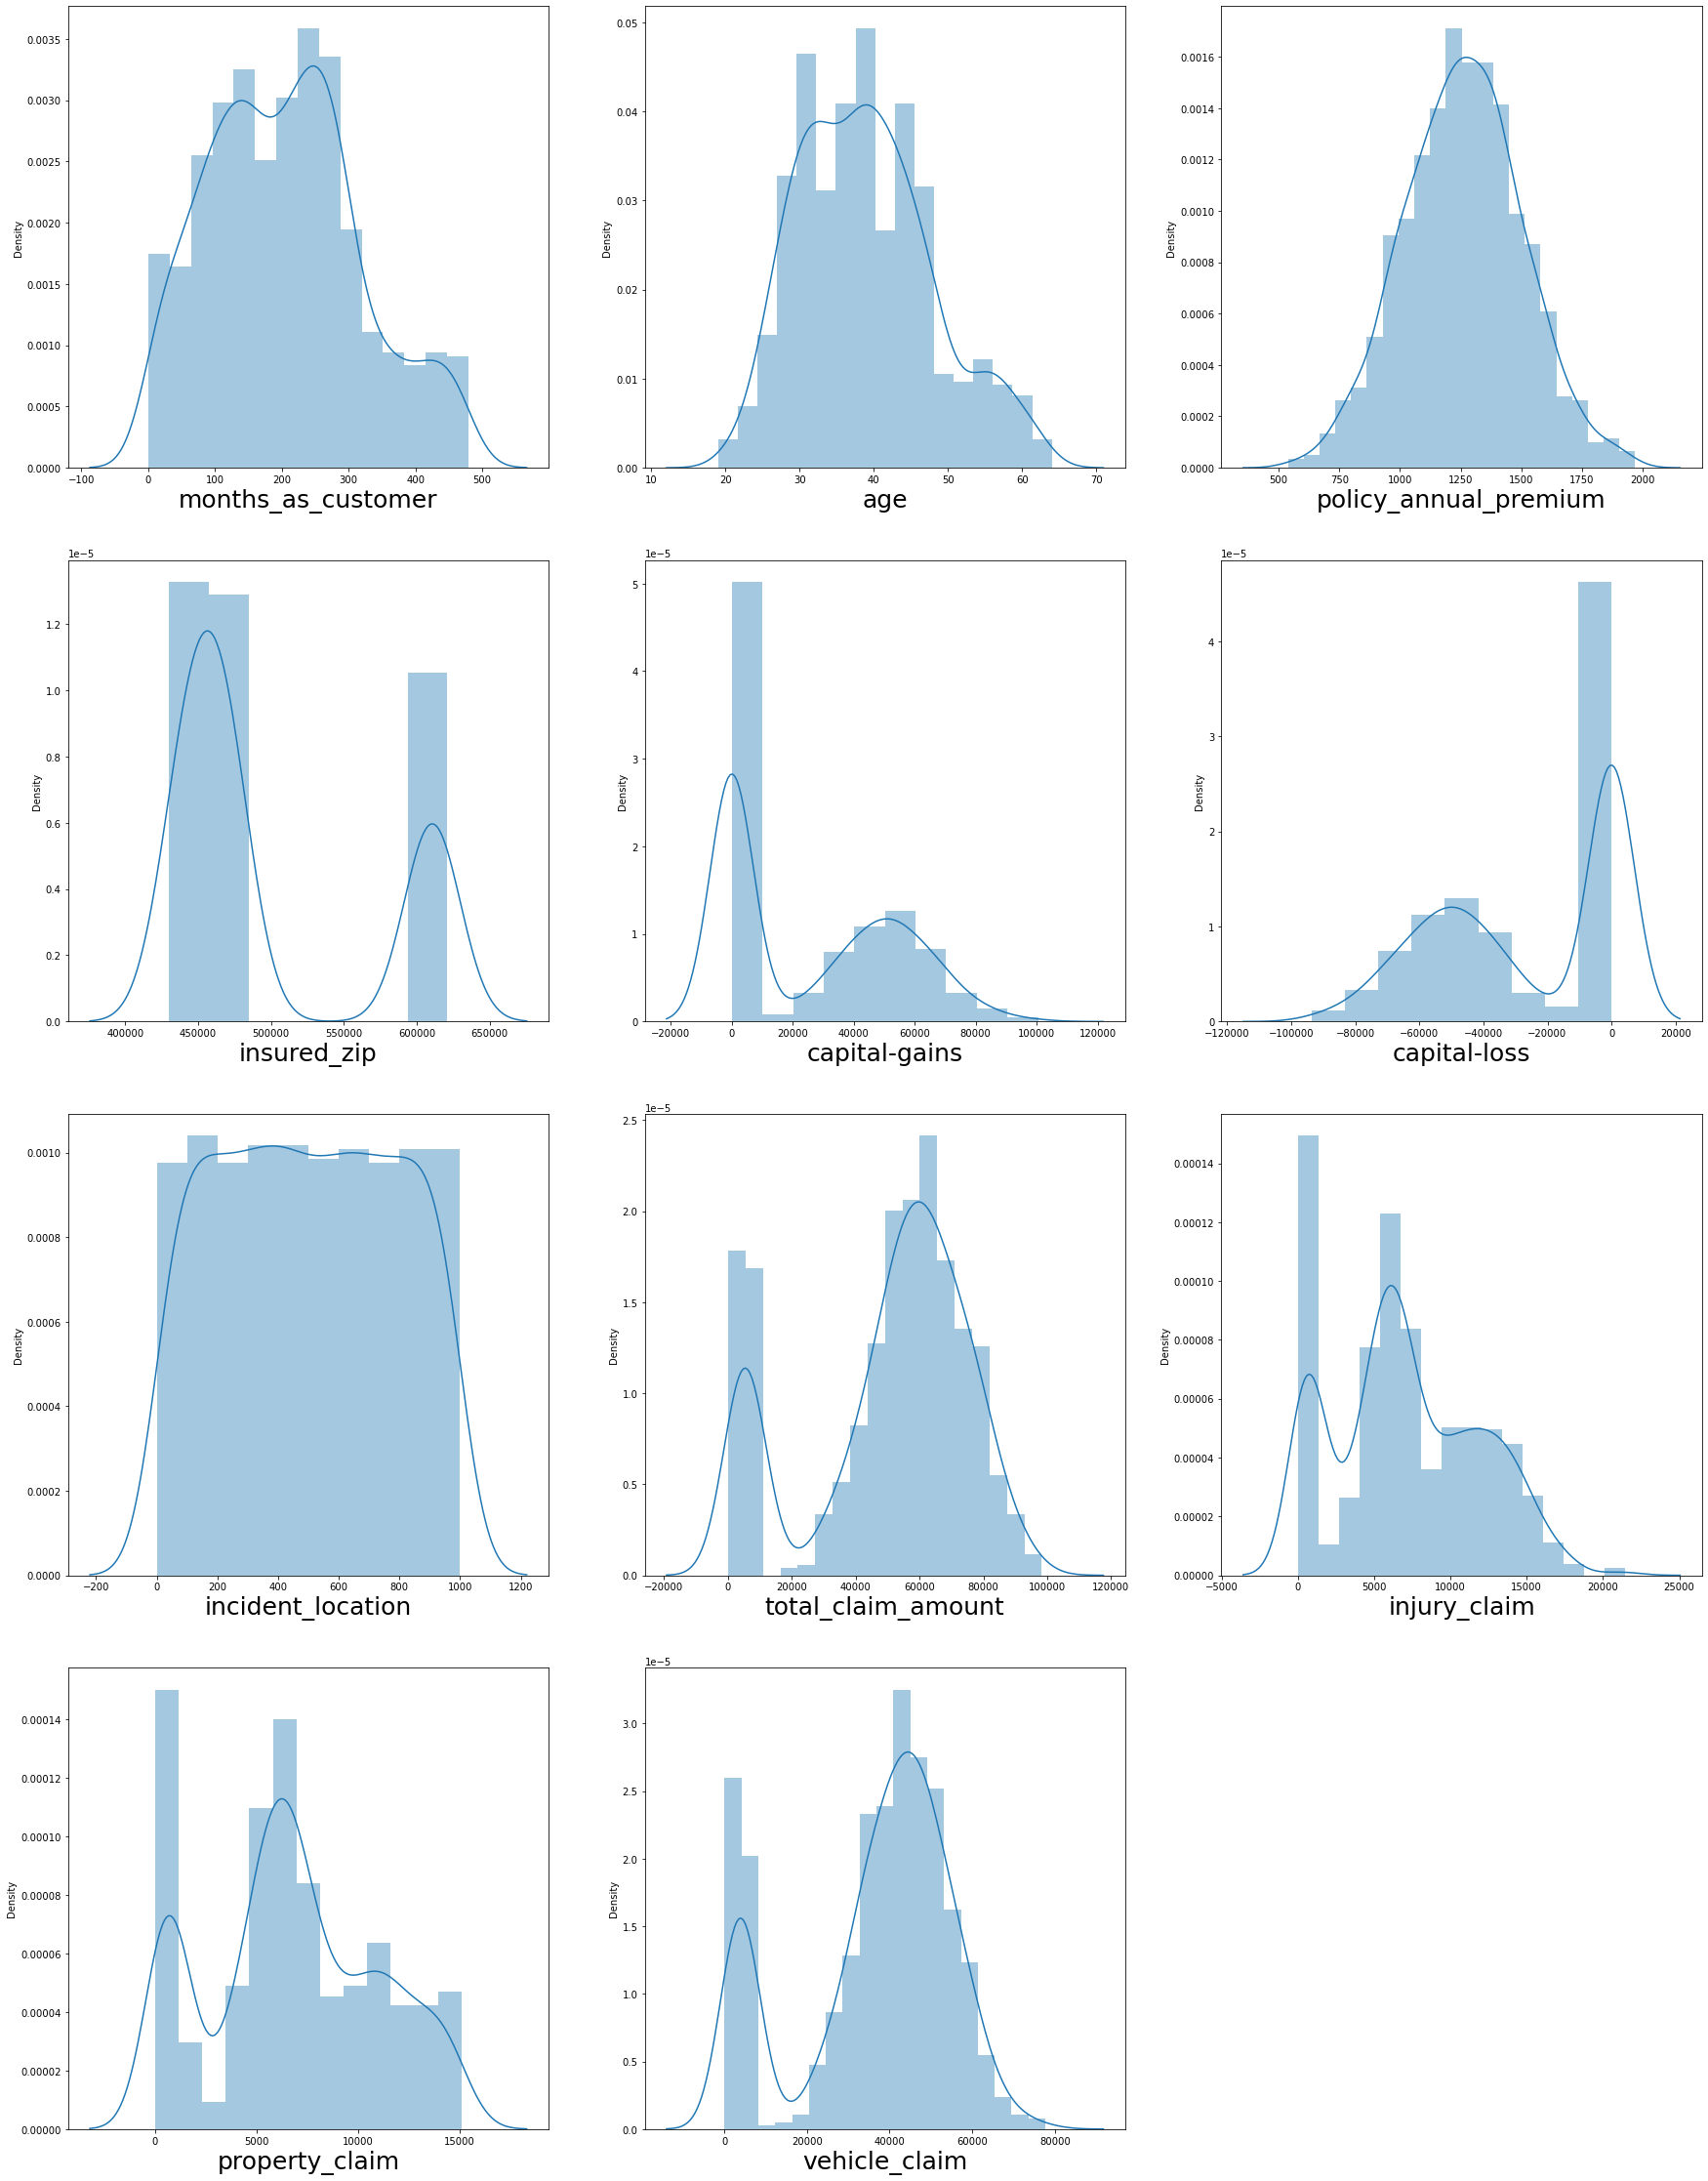

In [117]:
plt.figure(figsize=(30,40))
plotnumber=1
for column in auto_2:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(auto_2[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

# Skewness removal

The most of the columns have normal distribution, only two feature 'capital-loss','capital-gains' has some skewness which is reduced by  using sqaure root method and cube root method

In [118]:
auto_2['capital-gains']=np.sqrt(auto_2['capital-gains'])
auto_2['capital-loss']=np.cbrt(auto_2['capital-loss'])

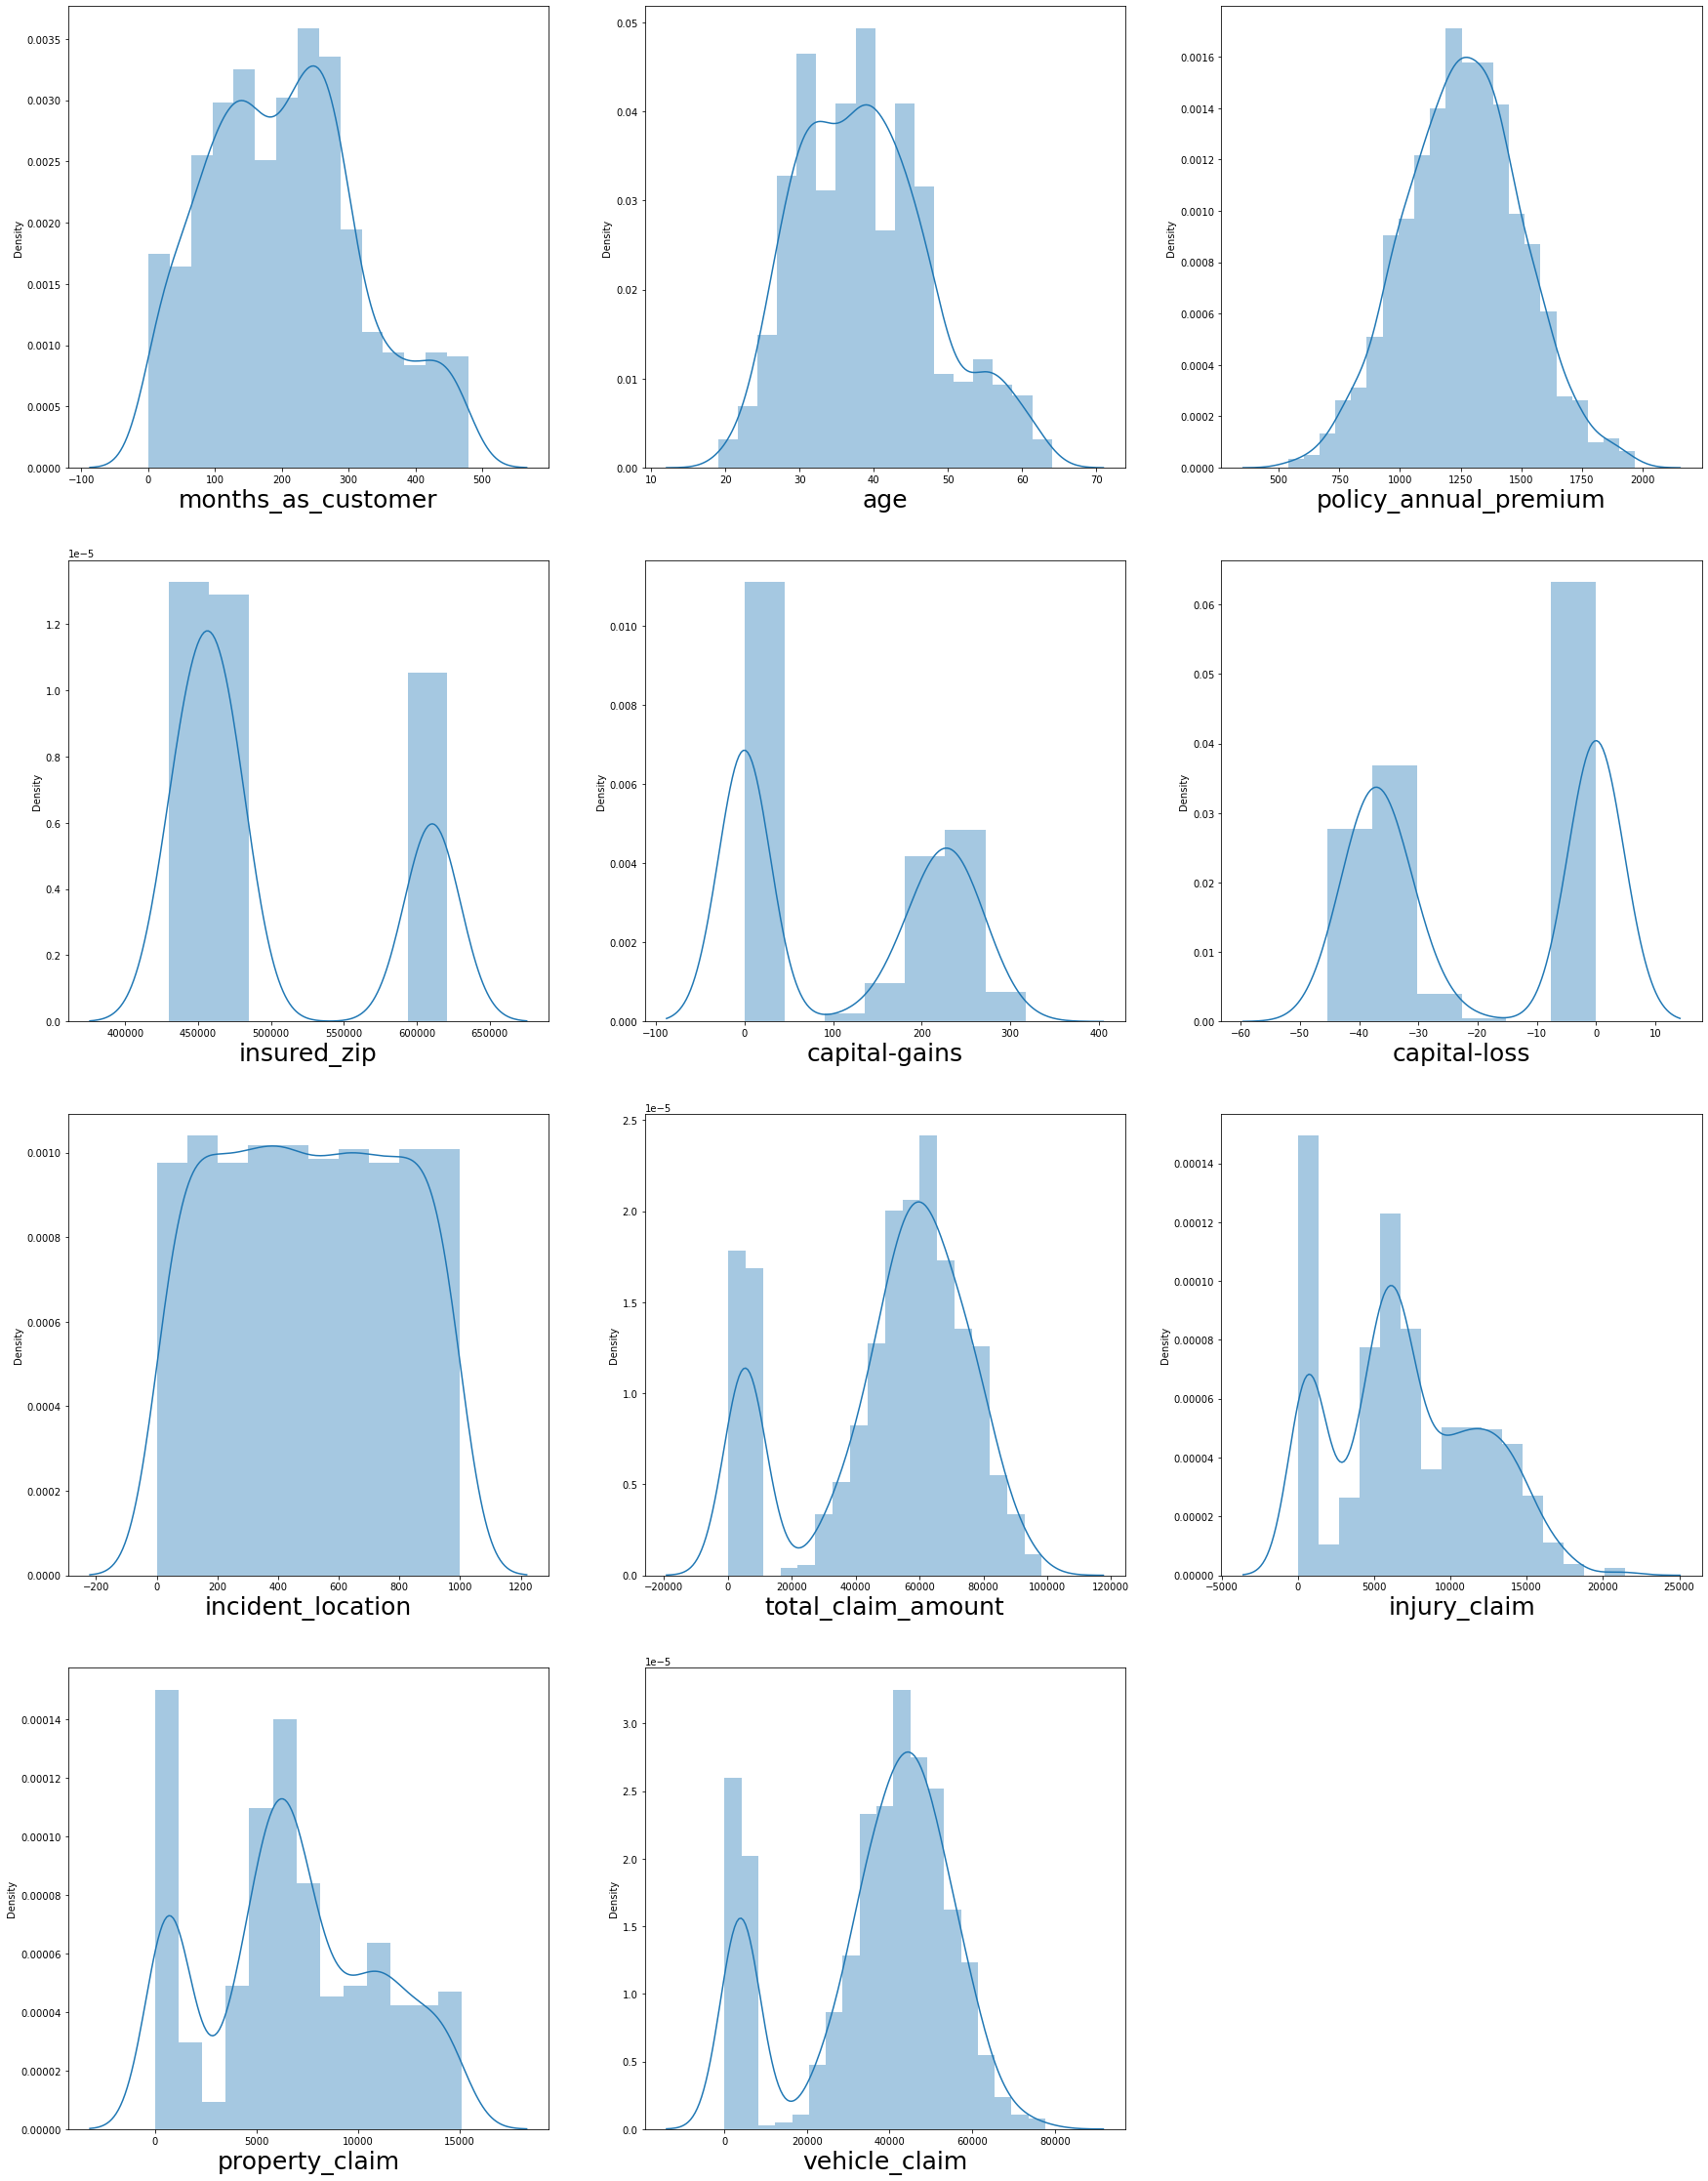

In [119]:
plt.figure(figsize=(30,40))
plotnumber=1
for column in auto_2:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(auto_2[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [120]:
auto_2=auto_2.reset_index(drop=True)

After removing outliers, it is necessary to reset index.

In [121]:
auto_2.shape

(934, 11)

In [122]:
auto_2.tail(50)

,months_as_customer,age,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_location,total_claim_amount,injury_claim,property_claim,vehicle_claim
884,31,32,1263.48,442948,216.333077,-44.361349,618,63600,5300,10600,47700
885,465,63,1006.99,458936,0.000000,0.000000,809,43560,4840,4840,33880
886,126,31,1328.26,613921,205.669638,-35.778475,268,60840,13520,6760,40560
887,407,55,1250.08,474598,0.000000,-38.641912,85,68160,11360,11360,45440
888,101,27,982.70,440865,175.499288,-35.223065,786,5170,940,470,3760
889,187,37,1412.06,450947,245.153013,0.000000,680,57700,5770,5770,46160
890,252,46,1066.70,473370,0.000000,0.000000,591,89520,14920,14920,59680
891,229,43,1585.54,463153,206.397674,-35.410141,933,4620,420,840,3360
892,246,39,1416.08,612546,0.000000,-33.201703,641,45180,5020,5020,35140
893,190,38,1246.03,442919,248.797106,-36.840315,431,45100,9020,4510,31570


In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(auto_2)

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

here i converted array into dataframe

In [124]:

auto_3=pd.DataFrame(x_scaled,columns = auto_2.columns)# here converted array into dataframe
auto_3

,months_as_customer,age,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_location,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.079847,0.995029,0.607465,-0.477928,1.042136,1.029673,1.720879,0.844833,-0.124004,1.496822,0.848551
1,0.205666,0.336144,-0.260174,-0.449206,-0.969558,1.029673,0.444894,-1.793571,-1.340460,-1.420755,-1.791509
2,-0.616063,-1.091440,0.633243,-0.976772,0.662937,1.029673,0.642533,-0.620683,0.128628,-0.688977,-0.726679
3,0.450437,0.226330,0.644001,1.517237,0.957314,-1.109850,0.587055,0.519295,-0.160095,-0.095450,0.774627
4,0.205666,0.555773,1.339842,1.553618,1.269010,-0.903073,-0.969785,-1.736870,-1.230066,-1.451742,-1.734979
...,...,...,...,...,...,...,...,...,...,...,...
929,-0.554871,-0.981626,0.359740,-0.976308,-0.969558,-1.314753,0.399818,-1.737663,-1.391411,-1.349246,-1.718128
930,-1.761240,-0.103112,0.209789,-0.967540,-0.969558,1.029673,0.212581,1.462998,2.196389,0.471856,1.335579
931,-0.651031,-0.542369,0.510560,-0.805830,0.662937,1.029673,0.854041,0.681866,0.086168,0.181052,0.871381
932,2.216282,2.532428,0.400620,-0.821048,-0.969558,1.029673,0.240320,-0.131781,-0.397866,-0.362418,0.003863


In [125]:
auto_3.isnull().sum()

months_as_customer       0
age                      0
policy_annual_premium    0
insured_zip              0
capital-gains            0
capital-loss             0
incident_location        0
total_claim_amount       0
injury_claim             0
property_claim           0
vehicle_claim            0
dtype: int64

In [126]:
auto_new = pd.concat([auto_3,auto_cat],axis=1)  # here concate both dataframe after scaling

here we concatenate continous feature dataframe and categorical dataframe

In [127]:
auto_new.shape

(1000, 42)

In [128]:
auto_new = auto_new.dropna(axis = 0)

dropna method is used drop those rows which has NaN values, the NaN values are created due to outlier removal

In [129]:
auto_new.shape

(934, 42)

In [130]:
auto_new.isnull().sum()

months_as_customer             0
age                            0
policy_annual_premium          0
insured_zip                    0
capital-gains                  0
capital-loss                   0
incident_location              0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses 

In [131]:
auto_new.head(3)

,months_as_customer,age,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_location,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported,day,month,year,Incident day,Incident month,Incident year
0,1.079847,0.995029,0.607465,-0.477928,1.042136,1.029673,1.720879,0.844833,-0.124004,1.496822,0.848551,2,1,1000,0,1,4,2,17,0,2,3,0,4,4,1,5,1,2,1,2,2,10,1,2004,1,17,10,2014,25,1,2015
1,0.205666,0.336144,-0.260174,-0.449206,-0.969558,1.029673,0.444894,-1.793571,-1.340460,-1.420755,-1.791509,1,1,2000,5000000,1,4,6,15,2,3,0,1,4,5,5,8,1,0,0,0,0,8,12,2007,1,27,6,2006,21,1,2015
2,-0.616063,-1.091440,0.633243,-0.976772,0.662937,1.029673,0.642533,-0.620683,0.128628,-0.688977,-0.726679,2,0,2000,5000000,0,6,11,2,3,0,2,1,4,1,1,7,3,1,2,3,1,4,30,2007,0,9,6,2000,22,2,2015


### In our dataset, total 42 columns are present , out of 42, "fraud_reported" is our target variable, which has two class 0 and 1, it is binary class, So our problem is Classification problem

In [132]:
x=auto_new.drop(columns=['fraud_reported'],axis=1)
y=auto_new['fraud_reported']

x has only feature and y has only label

In [133]:
x.shape

(934, 41)

In [134]:
y.shape

(934,)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

classification score is used to check performance of classification model,classification score give accuracy which is ratio of true predictions divided by total predictions.classification report contains precision,f1 score and accuracy

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [136]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.8547008547008547 on Random state 172


Whatever number we get as a random state is used by train test split in below code

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [139]:
Log_reg=LogisticRegression()
Log_reg.fit(x_train,y_train)
Log_reg_pred=Log_reg.predict(x_test)
Log_reg_accuracy=accuracy_score(y_test,Log_reg_pred)
print('Log_reg_accuracy',Log_reg_accuracy*100)

Log_reg_accuracy 78.63247863247864


Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variable

In [140]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
DTC_pred=DTC.predict(x_test)# predict output according test data
DTC_accuracy=accuracy_score(y_test,DTC_pred) #here we compared y_test with predicted output
print('DTC_accuracy',DTC_accuracy*100)

DTC_accuracy 83.33333333333334


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [141]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
KNC_pred=KNC.predict(x_test)# predict output according test data
KNC_accuracy=accuracy_score(y_test,KNC_pred) #here we compared y_test with predicted output
print('KNC_accuracy',KNC_accuracy*100)

KNC_accuracy 72.22222222222221


KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [142]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
svc_pred=svc.predict(x_test) #predict output according test data
svc_accuracy=accuracy_score(y_test,svc_pred) #here we compared y_test with predicted output
print('svc_accuracy',svc_accuracy*100)

svc_accuracy 78.63247863247864


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [143]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
RFC_pred=RFC.predict(x_test) #predict label according test feature
RFC_accuracy=accuracy_score(y_test,RFC_pred)#here we compared test label with predicted label
print('RFC_accuracy',RFC_accuracy*100)

RFC_accuracy 81.19658119658119


RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [144]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
GBC_pred=GBC.predict(x_test) #predict label according test feature
GBC_accuracy=accuracy_score(y_test,GBC_pred)#here we compared test label with predicted label
print('GBC_accuracy',GBC_accuracy*100)

GBC_accuracy 88.88888888888889


Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [145]:
XBC=XGBClassifier(eval_metric='mlogloss')
XBC.fit(x_train,y_train)# fit training data to classifier
XBC_pred=XBC.predict(x_test) #predict label according test feature
XBC_accuracy=accuracy_score(y_test,XBC_pred)#here we compared test label with predicted label
print('XBC_accuracy',XBC_accuracy*100)

XBC_accuracy 86.32478632478633


In [146]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [147]:
Log_reg_cv_score=cross_val_score(Log_reg,x,y,cv=5).mean() # we pass Logistic regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Log_reg_cv_score*100

74.94681156920245

In [148]:
DTC_CV_score=cross_val_score(DTC,x,y,cv=5).mean() # we pass Decision Tree classifier model,feature,target and cv=5 means 4 set for training and 1 for testing
DTC_CV_score*100

78.91323098154218

In [149]:
KNC_CV_score=cross_val_score(KNC,x,y,cv=5).mean() # we pass model K neighbors Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
KNC_CV_score*100

68.95118164567879

In [150]:
svc_CV_score=cross_val_score(svc,x,y,cv=5).mean() # we pass model Support Vector Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
svc_CV_score*100

74.83985969754471

In [151]:
RFC_CV_score=cross_val_score(RFC,x,y,cv=5).mean() # we pass model Random Forest Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
RFC_CV_score*100

76.76786843769767

In [152]:
GBC_CV_score=cross_val_score(GBC,x,y,cv=5).mean() # we pass model Gradient boosting Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
GBC_CV_score*100

80.62503593812892

In [153]:
XBC_CV_score=cross_val_score(XBC,x,y,cv=5).mean() # we pass model Extreme Gradient boosting,feature,target and cv=5 means 4 set for training and 1 for testing
XBC_CV_score*100

82.44551779656145

In [154]:
Logistic_regression_diff=Log_reg_accuracy*100-Log_reg_cv_score*100
print('Logistic_regression_diff',Logistic_regression_diff)
DTC_diff=DTC_accuracy*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)
XBC_diff=XBC_accuracy*100-XBC_CV_score*100
print("XBC_diff",XBC_diff)

Logistic_regression_diff 3.6856670632761848
DTC_diff 4.420102351791158
KNC_diff 3.2710405765434274
svc_diff 3.7926189349339268
RFC_diff 4.4287127588835205
GBC_diff 8.263852950759969
XBC_diff 3.879268528224884


In above line, we take difference of accuracy score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [155]:
print("Log_reg_accuracy",Log_reg_accuracy)
print("Log_reg_cv_score", Log_reg_cv_score)
print("Logistic_regression_diff", Logistic_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("DTC_accuracy",DTC_accuracy)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy",KNC_accuracy)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy",svc_accuracy)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy",RFC_accuracy)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)

print("-------------------------------------------------------------------------------------------")

print("GBC_accuracy",GBC_accuracy)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

print("-------------------------------------------------------------------------------------------")

print("XBC_accuracy",XBC_accuracy)
print("XBC_CV_score",XBC_CV_score) 
print("XBC_diff",XBC_diff)

Log_reg_accuracy 0.7863247863247863
Log_reg_cv_score 0.7494681156920245
Logistic_regression_diff 3.6856670632761848
-------------------------------------------------------------------------------------------
DTC_accuracy 0.8333333333333334
DTC_CV_score 0.7891323098154218
DTC_diff 4.420102351791158
-------------------------------------------------------------------------------------------
KNC_accuracy 0.7222222222222222
KNC_CV_score 0.6895118164567879
KNC_diff 3.2710405765434274
-------------------------------------------------------------------------------------------
svc_accuracy 0.7863247863247863
svc_CV_score 0.7483985969754471
svc_diff 3.7926189349339268
-------------------------------------------------------------------------------------------
RFC_accuracy 0.811965811965812
RFC_CV_score 0.7676786843769767
RFC_diff 4.4287127588835205
-------------------------------------------------------------------------------------------
GBC_accuracy 0.8888888888888888
GBC_CV_score 0.80625035938

Here we get Accuracy ,CV score and Difference between them,for Extreme Gradient Boosting,difference is less as compared to other algorithm,but accuracy and CV score for XGB is more than other algorithm. so we will prefer hyperparameter tuning for Extreme Gradient Boosting.

In [156]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [167]:
params={
       'booster':['gbtree'],
       'max_depth':[4,5,6],
       'gamma':[0,1,2,3],
       'min_child_weight':[1,2,3,4],
     'learning_rate':[0.1,0.3,0.5,0.8]}

In [168]:
Grid_XGB=GridSearchCV(XGBClassifier(eval_metric='mlogloss'),param_grid=params,cv=5)
Grid_XGB.fit(x_train,y_train)
Grid_XGB.best_params_

{'booster': 'gbtree',
 'gamma': 3,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2}

In [169]:
Final_XGB=XGBClassifier(eval_metric='mlogloss',booster='gbtree',gamma=3,learning_rate=0.1 ,max_depth=4,min_child_weight=2)
Final_XGB.fit(x_train,y_train)

final_pred=Final_XGB.predict(x_test)
final_score=accuracy_score(y_test,final_pred)
print(final_score*100)

87.17948717948718


In [170]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

array([[163,  21],
       [  9,  41]], dtype=int64)

Confusion matrix give us matrix of TN,TP,FP and FN



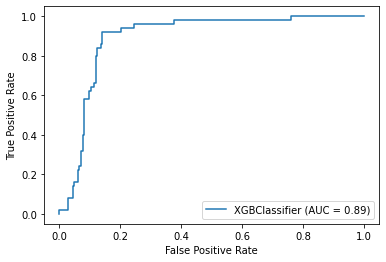

In [161]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(Final_XGB,x_test,y_test)

This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our Extreme Gradient Boosting classifier ROC curve cover almost more than 80 % area under it.

In [171]:
import joblib
joblib.dump(Final_XGB,"Automobile Insurance Fraud Project.pkl")

['Automobile Insurance Fraud Project.pkl']

### Here we saved model sucessfully